If you work from collab, write "1" below, from pc - "0"

In [1]:
# while True:
#     print("Please Select if you want work from: \n 0 - home pc \n 1 - colab :") 
#     selection = input()
#     if selection == '0': 
#         colab = 0
#         print("You want work from pc")
#         break
#     elif selection =='1': 
#         colab = 1
#         print("You will work from colab\n")
#         break
#     else: 
#         print("Unknown Option Selected! Only 0 or 1 accepted")

# Wikipedia: blocking of users and policies


## Useful libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv 
import matplotlib.gridspec as gridspec
# import json
import datetime as dt
import scipy.stats as stat
import seaborn as sns
from sklearn import preprocessing

## Plot functions

In [3]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'

In [4]:
def show_plot_1(x, y, my_title = "", my_xlabel = "", my_ylabel = ""):
    plt.figure(figsize=(21, 8))
    plt.plot(x, y)
    
    plt.title(my_title)
    plt.xlabel(my_xlabel)
    plt.ylabel(my_ylabel)

    plt.show()

In [5]:
def show_plot_2(x1,y1, x2,y2, my_title = "", my_xlabel = "", my_ylabel = "", legend_1="", legend_2=""):
    fig, ax = plt.subplots(figsize=(21, 8))
    
    ax.plot(x1, y1, color='blue')
    ax.plot(x2, y2, color='red')
    plt.legend([legend_1, legend_2], loc=0)

    plt.title(my_title)
    plt.xlabel(my_xlabel)
    plt.ylabel(my_ylabel)

    plt.show()

## Read files from colab/pc - select!

In [6]:
# if you run in colab - use this to connect to folders

# # SINCE NOT RUNNING IN COLLAB COMMENTING OUT HERE 
# print(colab)
# if colab == 1:
#     from google.colab import drive
#     drive.mount('/content/drive/')
#     # no space in the root name folder
#     %cd drive/MyDrive/Wikipedia-Block-log/
#     # path to the original data folder and results folder
#     folder = 'data_original/' 
#     folder_result = 'data_results/' 
# elif collab == 0:
#     # path to the original data folder and results folder
#     folder = '../data_original/' 
#     folder_result = '../data_results/' 

# **Part A:** Reading, cleaning and processing original data to our needs

In [7]:
# setting up the working directory in local machine 

folder = "D:\LPI\Open Science\Wikipedia_2022\data_original"
folder_result = "D:\LPI\Open Science\Wikipedia_2022\data_results"


### **1. Reading the freq_policies_monthly.csv file and seeing the data**

In [8]:
file = '/freq_policies_monthly.csv'
freq_policies_monthly = pd.read_csv(folder + file)
freq_policies_monthly['month'] = pd.to_datetime(freq_policies_monthly['month']) 
print(freq_policies_monthly.shape)
freq_policies_monthly.head()

(215, 2)


,month,nb_policies
0,2005-01-01,28
1,2005-02-01,28
2,2005-03-01,28
3,2005-04-01,29
4,2005-05-01,29


### **2. Reading the MonthlyEditAndEditorsFrom2004-2017.csv' file and cleaning**

In [9]:
file = '/MonthlyEditAndEditorsFrom2004-2017.csv'
df_edit_editors_04_07 = pd.read_csv(folder + file)
# df_edit_editors_04_07['month'] == pd.to_datetime(df_edit_editors_04_07['month'])
print(df_edit_editors_04_07.shape)
df_edit_editors_04_07.head()



(168, 3)


,month,edits,editors
0,2004-01-01T00:00:00.000Z,218853,14858
1,2004-02-01T00:00:00.000Z,310206,19883
2,2004-03-01T00:00:00.000Z,440685,26881
3,2004-04-01T00:00:00.000Z,405181,26519
4,2004-05-01T00:00:00.000Z,420408,28361


In [10]:
# checkingg if there are NaN values
nan_count = df_edit_editors_04_07['editors'].isnull().sum()
nan_count

0

In [11]:
# Now we are designing the MonthlyEditAndEditorsFrom2004-2017.csv data to our needs

# cleaning month column to have proper format
df_edit_editors_04_07['month'] = pd.to_datetime(df_edit_editors_04_07['month'])

print(df_edit_editors_04_07.shape)

# keeping only values from 2005 and onwards
df_edit_editors_04_07 = df_edit_editors_04_07[df_edit_editors_04_07['month'] >= '2005-01-01']

# converting back to date format 
df_edit_editors_04_07['month'] = df_edit_editors_04_07['month'].dt.date

# resetting the windows so starts at 0
df_edit_editors_04_07.reset_index(drop=True, inplace=True)

print(df_edit_editors_04_07.shape)

df_edit_editors_04_07.tail()
# plt.plot(df_edit_editors_04_07['month'],df_edit_editors_04_07['edits'])

(168, 3)
(156, 3)


,month,edits,editors
151,2017-08-01,4686591,399409
152,2017-09-01,4666223,398494
153,2017-10-01,4696462,436203
154,2017-11-01,4622820,434451
155,2017-12-01,4797589,409054


### **3. Reading the wikipedia_en_editors_filtered.csv file and cleaning**
1. We are only keeping values from Jan-2005 to Dec-2017 (Because the scraped data is until 2017)
2. Keeping the time in proper format
3. Other basic cleaning  

In [12]:
file = '/wikipedia_en_editors_filtered.csv'
df_editors_filtered= pd.read_csv(folder + file)

print(df_editors_filtered.shape)
df_editors_filtered.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_editors_filtered.head()

(276, 7)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2001-01-01T00:00:00.000Z,44,66,NaN,NaN
1,2001-02-01T00:00:00.000Z,24,45,NaN,NaN
2,2001-03-01T00:00:00.000Z,88,79,NaN,NaN
3,2001-04-01T00:00:00.000Z,64,44,NaN,NaN
4,2001-05-01T00:00:00.000Z,85,58,NaN,NaN


In [13]:
# identifying which columns have NaN values
nan_count = df_editors_filtered.isnull().sum()
print(nan_count)

# Replacing NaN values with 0
df_editors_filtered['total.name-bot'].fillna(0, inplace=True)
df_editors_filtered['total.group-bot'].fillna(0, inplace=True)

# checking if there are yet any NaN values
nan_count = df_editors_filtered.isnull().sum()
print("After replacement: \n" ,nan_count)

month               0
total.anonymous     0
total.user          0
total.name-bot     23
total.group-bot    38
dtype: int64
After replacement: 
 month              0
total.anonymous    0
total.user         0
total.name-bot     0
total.group-bot    0
dtype: int64


In [14]:
# cleaning month column to have proper format
df_editors_filtered['month'] = pd.to_datetime(df_editors_filtered['month'])

print(df_editors_filtered.shape)

# keeping only values from 2005 and 2017
df_editors_filtered = df_editors_filtered[df_editors_filtered['month'] >= '2005-01-01']
df_editors_filtered = df_editors_filtered[df_editors_filtered['month'] <= '2017-12-31']

# converting back to date format 
df_editors_filtered['month'] = df_editors_filtered['month'].dt.date

# resetting the windows so starts at 0
df_editors_filtered.reset_index(drop=True, inplace=True)

print(df_editors_filtered.shape)

df_editors_filtered.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_editors_filtered['month'],df_editors_filtered['total.anonymous'])

(276, 5)
(156, 5)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,65476,14694,18.0,2.0
1,2005-02-01,60723,15056,28.0,2.0
2,2005-03-01,74055,18243,29.0,2.0
3,2005-04-01,92101,21373,31.0,2.0
4,2005-05-01,102733,23181,35.0,4.0


### **4. Reading the wikipedia_en_active_editors.csv file and cleaning**

In [15]:
file = '/wikipedia_en_active_editors.csv'
df_active_editors= pd.read_csv(folder + file)
print(df_active_editors.shape)
df_active_editors.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_active_editors.head()

(276, 4)


,month,total.total
0,2001-01-01T00:00:00.000Z,17
1,2001-02-01T00:00:00.000Z,20
2,2001-03-01T00:00:00.000Z,35
3,2001-04-01T00:00:00.000Z,26
4,2001-05-01T00:00:00.000Z,31


In [16]:
# identifying which columns have NaN values
nan_count = df_active_editors.isnull().sum()
print(nan_count)

# Replacing NaN values with 0
df_active_editors['total.total'].fillna(0, inplace=True)

# checking if there are yet any NaN values
nan_count = df_active_editors.isnull().sum()
print("After replacement: \n" ,nan_count)

month          0
total.total    0
dtype: int64
After replacement: 
 month          0
total.total    0
dtype: int64


In [17]:
# cleaning month column to have proper format
df_active_editors['month'] = pd.to_datetime(df_active_editors['month'])

print(df_active_editors.shape)

# keeping only values from 2005 and 2017
df_active_editors = df_active_editors[df_active_editors['month'] >= '2005-01-01']
df_active_editors = df_active_editors[df_active_editors['month'] <= '2017-12-31']

# converting back to date format 
df_active_editors['month'] = df_active_editors['month'].dt.date

# resetting the windows so starts at 0
df_active_editors.reset_index(drop=True, inplace=True)

print(df_active_editors.shape)

df_active_editors.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_active_editors['month'],df_active_editors['total.total'])

(276, 2)
(156, 2)


,month,total.total
0,2005-01-01,6871
1,2005-02-01,6872
2,2005-03-01,8543
3,2005-04-01,10039
4,2005-05-01,10911


### **5. Reading the wikipedia_en_edits_filtered.csv file and cleaning**

In [18]:
file = '/wikipedia_en_edits_filtered.csv'
df_edits_filtered = pd.read_csv(folder + file)
print(df_edits_filtered.shape)
df_edits_filtered.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_edits_filtered.head()

(276, 7)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2001-01-01T00:00:00.000Z,95,440,NaN,NaN
1,2001-02-01T00:00:00.000Z,144,803,NaN,NaN
2,2001-03-01T00:00:00.000Z,429,1367,NaN,NaN
3,2001-04-01T00:00:00.000Z,231,958,NaN,NaN
4,2001-05-01T00:00:00.000Z,342,2028,NaN,NaN


In [19]:
# identifying which columns have NaN values
nan_count = df_edits_filtered.isnull().sum()
print(nan_count)

# Replacing NaN values with 0
df_edits_filtered['total.name-bot'].fillna(0, inplace=True)
df_edits_filtered['total.group-bot'].fillna(0, inplace=True)

# checking if there are yet any NaN values
nan_count = df_edits_filtered.isnull().sum()
print("After replacement: \n" ,nan_count)

month               0
total.anonymous     0
total.user          0
total.name-bot     23
total.group-bot    38
dtype: int64
After replacement: 
 month              0
total.anonymous    0
total.user         0
total.name-bot     0
total.group-bot    0
dtype: int64


In [20]:
# cleaning month column to have proper format
df_edits_filtered['month'] = pd.to_datetime(df_edits_filtered['month'])

print(df_edits_filtered.shape)

# keeping only values from 2005 and 2017
df_edits_filtered = df_edits_filtered[df_edits_filtered['month'] >= '2005-01-01']
df_edits_filtered = df_edits_filtered[df_edits_filtered['month'] <= '2017-12-31']

# converting back to date format 
df_edits_filtered['month'] = df_edits_filtered['month'].dt.date

# resetting the windows so starts at 0
df_edits_filtered.reset_index(drop=True, inplace=True)

print(df_edits_filtered.shape)

df_edits_filtered.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_edits_filtered['month'],df_edits_filtered['total.user'])

(276, 5)
(156, 5)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,199826,594798,1923.0,3160.0
1,2005-02-01,193228,592628,2128.0,1364.0
2,2005-03-01,242362,770234,9740.0,1728.0
3,2005-04-01,329974,929123,29911.0,4866.0
4,2005-05-01,365311,969462,24931.0,4664.0


### **6. Reading the wikipedia_en_edited_pages.csv file and cleaning**

In [21]:
file = '/wikipedia_en_edited_pages.csv'
df_edited_pages = pd.read_csv(folder + file)
print(df_edited_pages.shape)
df_edited_pages.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_edited_pages.head()

(276, 7)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2001-01-01T00:00:00.000Z,18,53,NaN,NaN
1,2001-02-01T00:00:00.000Z,26,161,NaN,NaN
2,2001-03-01T00:00:00.000Z,191,492,NaN,NaN
3,2001-04-01T00:00:00.000Z,111,584,NaN,NaN
4,2001-05-01T00:00:00.000Z,205,1274,NaN,NaN


In [22]:
# identifying which columns have NaN values
nan_count = df_edited_pages.isnull().sum()
print(nan_count)

# Replacing NaN values with 0
df_edited_pages['total.name-bot'].fillna(0, inplace=True)
df_edited_pages['total.group-bot'].fillna(0, inplace=True)

# checking if there are yet any NaN values
nan_count = df_edited_pages.isnull().sum()
print("After replacement: \n" ,nan_count)

month               0
total.anonymous     0
total.user          0
total.name-bot     23
total.group-bot    38
dtype: int64
After replacement: 
 month              0
total.anonymous    0
total.user         0
total.name-bot     0
total.group-bot    0
dtype: int64


In [23]:
# cleaning month column to have proper format
df_edited_pages['month'] = pd.to_datetime(df_edited_pages['month'])

print(df_edited_pages.shape)

# keeping only values from 2005 and 2017
df_edited_pages = df_edited_pages[df_edited_pages['month'] >= '2005-01-01']
df_edited_pages = df_edited_pages[df_edited_pages['month'] <= '2017-12-31']

# converting back to date format 
df_edited_pages['month'] = df_edited_pages['month'].dt.date

# resetting the windows so starts at 0
df_edited_pages.reset_index(drop=True, inplace=True)

print(df_edited_pages.shape)

df_edited_pages.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_edited_pages['month'],df_edited_pages['total.user'])

(276, 5)
(156, 5)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,66918,175598,1268.0,2970.0
1,2005-02-01,66906,176741,1538.0,1205.0
2,2005-03-01,81284,219188,4975.0,1618.0
3,2005-04-01,99532,250281,22458.0,4557.0
4,2005-05-01,109594,261928,18046.0,3975.0


### **7. Reading the wikipedia_en_edited_pages_conoc.csv file and cleaning**

In [24]:
file = '/wikipedia_en_edited_pages_conoc.csv'
df_edited_pages_conoc = pd.read_csv(folder + file)
print(df_edited_pages_conoc.shape)
df_edited_pages_conoc.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_edited_pages_conoc.head()

(276, 5)


,month,total.non-content,total.content
0,2001-01-01T00:00:00.000Z,28,38
1,2001-02-01T00:00:00.000Z,29,148
2,2001-03-01T00:00:00.000Z,89,510
3,2001-04-01T00:00:00.000Z,51,604
4,2001-05-01T00:00:00.000Z,71,1351


In [25]:
# cleaning month column to have proper format
df_edited_pages_conoc['month'] = pd.to_datetime(df_edited_pages_conoc['month'])

print(df_edited_pages_conoc.shape)

# keeping only values from 2005 and 2017
df_edited_pages_conoc = df_edited_pages_conoc[df_edited_pages_conoc['month'] >= '2005-01-01']
df_edited_pages_conoc = df_edited_pages_conoc[df_edited_pages_conoc['month'] <= '2017-12-31']

# converting back to date format 
df_edited_pages_conoc['month'] = df_edited_pages_conoc['month'].dt.date

# resetting the windows so starts at 0
df_edited_pages_conoc.reset_index(drop=True, inplace=True)

print(df_edited_pages_conoc.shape)

df_edited_pages_conoc.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_edited_pages_conoc['month'],df_edited_pages_conoc['total.non-content'])
# plt.plot(df_edited_pages_conoc['month'],df_edited_pages_conoc['total.content'])

(276, 3)
(156, 3)


,month,total.non-content,total.content
0,2005-01-01,38977,162240
1,2005-02-01,39771,161811
2,2005-03-01,49885,198997
3,2005-04-01,59181,233517
4,2005-05-01,62047,245289


### **8. Reading the wikipedia_en_page_views.csv file and cleaning**
(FOR NOW SKIPPING THIS DATAFRAME, NOT ENOUGH DATA)

In [26]:
file = '/wikipedia_en_page_views.csv'
df_page_views = pd.read_csv(folder + file)
print(df_page_views.shape)
df_page_views.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_page_views.head()

(96, 6)


,month,total.mobile-web,total.mobile-app,total.desktop
0,2016-01-01T00:00:00.000Z,3722494664,106432770,5501942159
1,2016-02-01T00:00:00.000Z,3336997265,92414138,5254955971
2,2016-03-01T00:00:00.000Z,3421694873,97899085,5283017698
3,2016-04-01T00:00:00.000Z,3306862507,81719005,5544327061
4,2016-05-01T00:00:00.000Z,3404277806,98738514,5313329373


In [27]:
# cleaning month column to have proper format
df_page_views['month'] = pd.to_datetime(df_page_views['month'])

print(df_page_views.shape)

# keeping only values from 2005 and 2017
df_page_views = df_page_views[df_page_views['month'] >= '2005-01-01']
df_page_views = df_page_views[df_page_views['month'] <= '2017-12-31']

# converting back to date format 
df_page_views['month'] = df_page_views['month'].dt.date

# resetting the windows so starts at 0
df_page_views.reset_index(drop=True, inplace=True)

print(df_page_views.shape)

df_page_views.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_page_views['month'],df_page_views['total.mobile-web'])

(96, 4)
(24, 4)


,month,total.mobile-web,total.mobile-app,total.desktop
0,2016-01-01,3722494664,106432770,5501942159
1,2016-02-01,3336997265,92414138,5254955971
2,2016-03-01,3421694873,97899085,5283017698
3,2016-04-01,3306862507,81719005,5544327061
4,2016-05-01,3404277806,98738514,5313329373


### **9. Reading the wikipedia_en_page_views_legacy.csv file and cleaning**

(FOR NOW SKIPPING THIS DATAFRAME, NOT ENOUGH DATA)

In [28]:
file = '/wikipedia_en_page_views_legacy.csv'
df_page_views_legacy = pd.read_csv(folder + file)
print(df_page_views_legacy.shape)
df_page_views_legacy.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_page_views_legacy.head()

(105, 4)


,month,total.total
0,2007-12-01T00:00:00.000Z,2998331524
1,2008-01-01T00:00:00.000Z,4930902570
2,2008-02-01T00:00:00.000Z,4818393763
3,2008-03-01T00:00:00.000Z,4955405809
4,2008-04-01T00:00:00.000Z,5159162183


In [29]:
# cleaning month column to have proper format
df_page_views_legacy['month'] = pd.to_datetime(df_page_views_legacy['month'])

print(df_page_views_legacy.shape)

# keeping only values from 2005 and 2017
df_page_views_legacy = df_page_views_legacy[df_page_views_legacy['month'] >= '2005-01-01']
df_page_views_legacy = df_page_views_legacy[df_page_views_legacy['month'] <= '2017-12-31']

# converting back to date format 
df_page_views_legacy['month'] = df_page_views_legacy['month'].dt.date

# resetting the windows so starts at 0
df_page_views_legacy.reset_index(drop=True, inplace=True)

print(df_page_views_legacy.shape)

df_page_views_legacy.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_page_views_legacy['month'],df_page_views_legacy['total.total'])

(105, 2)
(105, 2)


,month,total.total
0,2007-12-01,2998331524
1,2008-01-01,4930902570
2,2008-02-01,4818393763
3,2008-03-01,4955405809
4,2008-04-01,5159162183


### **10. Reading the wikipedia_en_pages2date.csv file and cleaning**

In [30]:
file = '/wikipedia_en_pages2date.csv'
df_pages2date= pd.read_csv(folder + file)
print(df_pages2date.shape)
df_pages2date.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_pages2date.head()

(276, 5)


,month,total.non-content,total.content
0,2001-01-01T00:00:00.000Z,28,38
1,2001-02-01T00:00:00.000Z,51,178
2,2001-03-01T00:00:00.000Z,127,630
3,2001-04-01T00:00:00.000Z,172,1197
4,2001-05-01T00:00:00.000Z,230,2437


In [31]:
# cleaning month column to have proper format
df_pages2date['month'] = pd.to_datetime(df_pages2date['month'])

print(df_pages2date.shape)

# keeping only values from 2005 and 2017
df_pages2date = df_pages2date[df_pages2date['month'] >= '2005-01-01']
df_pages2date = df_pages2date[df_pages2date['month'] <= '2017-12-31']

# converting back to date format 
df_pages2date['month'] = df_pages2date['month'].dt.date

# resetting the windows so starts at 0
df_pages2date.reset_index(drop=True, inplace=True)

print(df_pages2date.shape)

df_pages2date.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_pages2date['month'],df_pages2date['total.content'])

(276, 3)
(156, 3)


,month,total.non-content,total.content
0,2005-01-01,230161,436782
1,2005-02-01,249240,456399
2,2005-03-01,274441,481853
3,2005-04-01,304580,511374
4,2005-05-01,333642,541295


### **11.Reading the wikipedia_en_new_pages.csv file and cleaing**

In [32]:
file = '/wikipedia_en_new_pages.csv'
df_new_pages= pd.read_csv(folder + file)
print(df_new_pages.shape)
df_new_pages.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_new_pages.head()

(276, 7)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2001-01-01T00:00:00.000Z,14,52,NaN,NaN
1,2001-02-01T00:00:00.000Z,17,146,NaN,NaN
2,2001-03-01T00:00:00.000Z,141,387,NaN,NaN
3,2001-04-01T00:00:00.000Z,83,529,NaN,NaN
4,2001-05-01T00:00:00.000Z,163,1135,NaN,NaN


In [33]:
# cleaning month column to have proper format
df_new_pages['month'] = pd.to_datetime(df_new_pages['month'])

print(df_new_pages.shape)

# keeping only values from 2005 and 2017
df_new_pages = df_new_pages[df_new_pages['month'] >= '2005-01-01']
df_new_pages = df_new_pages[df_new_pages['month'] <= '2017-12-31']

# converting back to date format 
df_new_pages['month'] = df_new_pages['month'].dt.date

# resetting the windows so starts at 0
df_new_pages.reset_index(drop=True, inplace=True)

print(df_new_pages.shape)

# getting rid of nan values
df_new_pages['total.group-bot'].fillna(0, inplace=True)
df_new_pages.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_new_pages['month'],df_new_pages['total.content'])

(276, 5)
(156, 5)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,7756,32798,24.0,0.0
1,2005-02-01,7144,31538,14.0,0.0
2,2005-03-01,9471,40994,190.0,0.0
3,2005-04-01,11297,47379,982.0,2.0
4,2005-05-01,12989,45811,180.0,3.0


### **12.Reading the wikipedia_en_new_reg.csv file and cleaing**

In [34]:
file = '/wikipedia_en_new_reg.csv'
df_new_reg= pd.read_csv(folder + file)
print(df_new_reg.shape)
df_new_reg.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_new_reg.head()

(259, 4)


,month,total.total
0,2001-01-01T00:00:00.000Z,5
1,2001-02-01T00:00:00.000Z,2
2,2001-03-01T00:00:00.000Z,7
3,2001-05-01T00:00:00.000Z,8
4,2001-06-01T00:00:00.000Z,3


In [35]:
# cleaning month column to have proper format
df_new_reg['month'] = pd.to_datetime(df_new_reg['month'])

print(df_new_reg.shape)

# keeping only values from 2005 and 2017
df_new_reg = df_new_reg[df_new_reg['month'] >= '2005-01-01']
df_new_reg = df_new_reg[df_new_reg['month'] <= '2017-12-31']

# converting back to date format 
df_new_reg['month'] = df_new_reg['month'].dt.date

# resetting the windows so starts at 0
df_new_reg.reset_index(drop=True, inplace=True)

print(df_new_reg.shape)

# getting rid of nan values
# df_new_reg['total.group-bot'].fillna(0, inplace=True)
df_new_reg.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_new_reg['month'],df_new_reg['total.total'])

(259, 2)
(156, 2)


,month,total.total
0,2005-01-01,2
1,2005-02-01,5
2,2005-03-01,11
3,2005-04-01,13
4,2005-05-01,7


### **13.Reading the block_log_data_cleaned.csv file and cleaing a column**
(The old scraped data)

In [36]:
file = '/block_log_data_cleaned.csv' 
df = pd.read_csv(folder + file)

print(df.shape)
df['timestamp'] = pd.to_datetime(df['timestamp'])

(4202626, 8)


In [37]:
df.head()

,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,[],NaN
1,#13255,unblock,Angela,2004-12-23,me,NaN,NaN,NaN
2,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,[],NaN
3,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,[],NaN
4,166.121.36.7,block,CryptoDerk,2004-12-23,"repeated repeated warnings, continued vandalism",infinity,[],NaN


In [38]:
df.describe()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,title,action,user,timestamp,comment,duration,flags,expiry
count,4202381,4202626,4202626,4202626,4202626,4136379,4136379,3298853
unique,3692933,3,1959,4323,369989,19050,34,2073255
top,ThisIsaTest,block,ProcseeBot,2013-10-29 00:00:00,{{blocked proxy}} <!-- 8080 -->,60 days,['nocreate'],2007-09-01T00:00:00Z
freq,597,4067771,2370014,12702,730464,1645505,3021835,520
first,NaN,NaN,NaN,2004-12-23 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-31 00:00:00,NaN,NaN,NaN,NaN


**First glance at the scraped data** 

When we first conducted our analysis (Dec 2022) our original dataframe had:
- 8 columns: title, action, user, timestamp, comment, duration, flags, expiry
- 4202626 entries (years 2004 to 2017)
- first timestamp: 2004-12-23 00:00:00, last timestamp: 2017-12-31 00:00:00

We later removed the year 2004 which held to few data to be relevant.

**title** = the user being blocked

**action** = block or unblock - we will only focus on block

**user** = the person (administrator) implementing the block

**timestamp** = the block event date

**comment** = blocking rationale

**duration** = blocking scheduled duration

**flag** = mysterious information

**expiry** = sometimes, a timestamp

### **14.Reading the block_log_data_cleaned_scraped.csv file and cleaing a column**
(This data is scraped by Hao and I am skipping running these cells for now)

In [39]:
# file = '/block_log_cleaned_scraped.csv' 
# df_scraped = pd.read_csv(folder + file)

# print(df_scraped.shape)
# # df['timestamp'] = pd.to_datetime(df['timestamp'])
# df_scraped.head()

In [40]:
# df_scraped['action'].value_counts()

In [41]:
# # keeping only block events 
# df_blocked = df_scraped[df_scraped['action'] == 'block']

# # watching the shape after removing non-block rows 
# print(df_blocked.shape)
# df_blocked.head()

In [42]:
# # get unique titles
# df_blocked = df_blocked.groupby(pd.PeriodIndex(df_blocked['timestamp'], freq="M"))['title'].apply(lambda x: len(x.unique()))
# print(df_blocked.shape)

# # resetting the index so indexing starts at 0
# df_blocked = df_blocked.reset_index()

# # converting the timestamp column in proper format
# df_blocked['timestamp'] = df_blocked['timestamp'].dt.to_timestamp()

# # changing the column name 
# df_blocked = df_blocked.rename(columns={"title": "blocked_people"})

# # updating monthly blocked dataframe by keeping values from 2005 and onwards
# df_blocked = df_blocked[df_blocked['timestamp'] >= '2005-01-01']

# # # resetting index so starts at 0
# df_blocked.reset_index(drop=True, inplace=True)

# # seeing data
# print(df_blocked.shape)
# df_blocked.tail()

# **Part B:** Relationship Analysis Between Features
## At first copying the dataframes of interest and summing appropriate columns 

### 1. Copying and summing df_editors_filtered dataframe

In [43]:
df_editors_filtered.columns

Index(['month', 'total.anonymous', 'total.user', 'total.name-bot',
       'total.group-bot'],
      dtype='object')

In [44]:
# giving new unique columns names for better identification
new_columns_names={'total.anonymous': 'editors.anonymous',
                   'total.user': 'editors.user',
                   'total.name-bot': 'editors.name-bot',
                   'total.group-bot': 'editors.group-bot'
                  }
editors = df_editors_filtered.copy()

# renaming the copied dataframe
editors.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
editors['editors.total'] = editors.sum(axis=1)
# editors.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


### 2. Copying and summing df_active_editors dataframe

In [45]:
df_active_editors.columns

Index(['month', 'total.total'], dtype='object')

In [46]:
# giving new unique columns names for better identification
new_columns_names={'total.total': 'active-editors.total'
                  }
active_editors = df_active_editors.copy()

# renaming the copied dataframe
active_editors.rename(columns=new_columns_names, inplace=True)
# active_editors.head()

### 3. Copying and summing df_edits_filtered dataframe

In [47]:
df_edits_filtered.columns

Index(['month', 'total.anonymous', 'total.user', 'total.name-bot',
       'total.group-bot'],
      dtype='object')

In [48]:
# giving new unique columns names for better identification
new_columns_names={'total.anonymous': 'edits.anonymous',
                   'total.user': 'edits.user',
                   'total.name-bot': 'edits.name-bot',
                   'total.group-bot': 'edits.group-bot'
                  }
edits = df_edits_filtered.copy()

# renaming the copied dataframe
edits.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
edits['edits.total'] = edits.sum(axis=1)
# edits.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


### 4. Copying and summing df_new_reg dataframe

In [49]:
df_new_reg.columns

Index(['month', 'total.total'], dtype='object')

In [50]:
# giving new unique columns names for better identification
new_columns_names={'total.total': 'new-reg.total'
}

new_reg = df_new_reg.copy()

# renaming the copied dataframe
new_reg.rename(columns=new_columns_names, inplace=True)
# new_reg.head()

### 5. Copying and summing df_new_pages dataframe

In [51]:
df_new_pages.columns

Index(['month', 'total.anonymous', 'total.user', 'total.name-bot',
       'total.group-bot'],
      dtype='object')

In [52]:
# giving new unique columns names for better identification
new_columns_names={'total.anonymous': 'new-pages.anonymous',
                   'total.user': 'new-pages.user',
                   'total.name-bot': 'new-pages.name-bot',
                   'total.group-bot': 'new-pages.group-bot'
                  }
new_pages = df_new_pages.copy()

# renaming the copied dataframe
new_pages.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
new_pages['new-pages.total'] = new_pages.sum(axis=1)
# new_pages.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


### 6. Copying and summing df_edited_pages dataframe

In [53]:
df_edited_pages.columns

Index(['month', 'total.anonymous', 'total.user', 'total.name-bot',
       'total.group-bot'],
      dtype='object')

In [54]:
# giving new unique columns names for better identification
new_columns_names={'total.anonymous': 'edited-pages.anonymous',
                   'total.user': 'edited-pages.user',
                   'total.name-bot': 'edited-pages.name-bot',
                   'total.group-bot': 'edited-pages.group-bot'
                  }
edited_pages = df_edited_pages.copy()

# renaming the copied dataframe
edited_pages.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
edited_pages['edited-pages.total'] = edited_pages.sum(axis=1)
# edited_pages.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


### 7. Copying and summing df_edited_pages dataframe

In [55]:
df_edited_pages_conoc.columns

Index(['month', 'total.non-content', 'total.content'], dtype='object')

In [56]:
# giving new unique columns names for better identification
new_columns_names={'total.non-content': 'edited-pages-conoc.non-content',
                   'total.content': 'edited-pages-conoc.content',
                  }
edited_pages_conoc = df_edited_pages_conoc.copy()

# renaming the copied dataframe
edited_pages_conoc.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
edited_pages_conoc['edited-pages-conoc.total'] = edited_pages_conoc.sum(axis=1)
# edited_pages_conoc.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


### 8. Copying and summing df_edited_pages dataframe

In [57]:
df_pages2date.columns

Index(['month', 'total.non-content', 'total.content'], dtype='object')

In [58]:
# giving new unique columns names for better identification
new_columns_names={'total.non-content': 'pages2date.non-content',
                   'total.content': 'pages2date.content',
                  }
pages2date= df_pages2date.copy()

# renaming the copied dataframe
pages2date.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
pages2date['pages2date.total'] = pages2date.sum(axis=1)
# pages2date.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


### Checking the shape of the copied dataframes to ensures row numbers are same

In [59]:
print(editors.shape)
print(active_editors.shape)
print(edits.shape)
print(new_reg.shape)
print(new_pages.shape)
print(edited_pages.shape)
print(edited_pages_conoc.shape)
print(pages2date.shape)

(156, 6)
(156, 2)
(156, 6)
(156, 2)
(156, 6)
(156, 6)
(156, 4)
(156, 4)


### Creating a copy of blocked account dataframe (prev year) and grouping by month on unique titles

In [60]:
# keeping only block events 
blocked_account = df[df['action'] == 'block']

# watching the shape after removing non-block rows 
print(blocked_account.shape)
blocked_account.head()

(4067771, 8)


,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,[],NaN
2,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,[],NaN
3,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,[],NaN
4,166.121.36.7,block,CryptoDerk,2004-12-23,"repeated repeated warnings, continued vandalism",infinity,[],NaN
5,68.210.228.209,block,CryptoDerk,2004-12-23,repeated warnings,infinity,[],NaN


In [61]:
# get unique titles
blocked_account = blocked_account.groupby(pd.PeriodIndex(blocked_account['timestamp'], freq="M"))['title'].apply(lambda x: len(x.unique()))
print(blocked_account.shape)

# resetting the index so indexing starts at 0
blocked_account = blocked_account.reset_index()

# converting the timestamp column in proper format
blocked_account['timestamp'] = blocked_account['timestamp'].dt.to_timestamp()

# changing the column name 
blocked_account = blocked_account.rename(columns={"title": "blocked_people"})

# updating monthly blocked dataframe by keeping values from 2005 and onwards
blocked_account = blocked_account[blocked_account['timestamp'] >= '2005-01-01']

# resetting index so starts at 0
blocked_account.reset_index(drop=True, inplace=True)

# dropping the month or timestamp column because its redundant
blocked_account.drop(columns=['timestamp'], inplace= True)

# seeing data
print(blocked_account.shape)
blocked_account.head()

(157,)
(156, 1)


,blocked_people
0,947
1,1207
2,715
3,625
4,590


### Merging all the dataframes together

In [62]:
# merging the dataframes
df_merged = pd.concat([editors,active_editors,edits,new_reg,new_pages,edited_pages,edited_pages_conoc,pages2date,blocked_account], axis=1)

# Drop duplicate 'month' columns
df_merged = df_merged.loc[:,~df_merged.columns.duplicated()]

df_merged.head()

,month,editors.anonymous,editors.user,editors.name-bot,editors.group-bot,editors.total,active-editors.total,edits.anonymous,edits.user,edits.name-bot,...,edited-pages.name-bot,edited-pages.group-bot,edited-pages.total,edited-pages-conoc.non-content,edited-pages-conoc.content,edited-pages-conoc.total,pages2date.non-content,pages2date.content,pages2date.total,blocked_people
0,2005-01-01,65476,14694,18.0,2.0,80190.0,6871,199826,594798,1923.0,...,1268.0,2970.0,246754.0,38977,162240,201217,230161,436782,666943,947
1,2005-02-01,60723,15056,28.0,2.0,75809.0,6872,193228,592628,2128.0,...,1538.0,1205.0,246390.0,39771,161811,201582,249240,456399,705639,1207
2,2005-03-01,74055,18243,29.0,2.0,92329.0,8543,242362,770234,9740.0,...,4975.0,1618.0,307065.0,49885,198997,248882,274441,481853,756294,715
3,2005-04-01,92101,21373,31.0,2.0,113507.0,10039,329974,929123,29911.0,...,22458.0,4557.0,376828.0,59181,233517,292698,304580,511374,815954,625
4,2005-05-01,102733,23181,35.0,4.0,125953.0,10911,365311,969462,24931.0,...,18046.0,3975.0,393543.0,62047,245289,307336,333642,541295,874937,590


### Now plotting the correlation heatmap on the merged dataframe

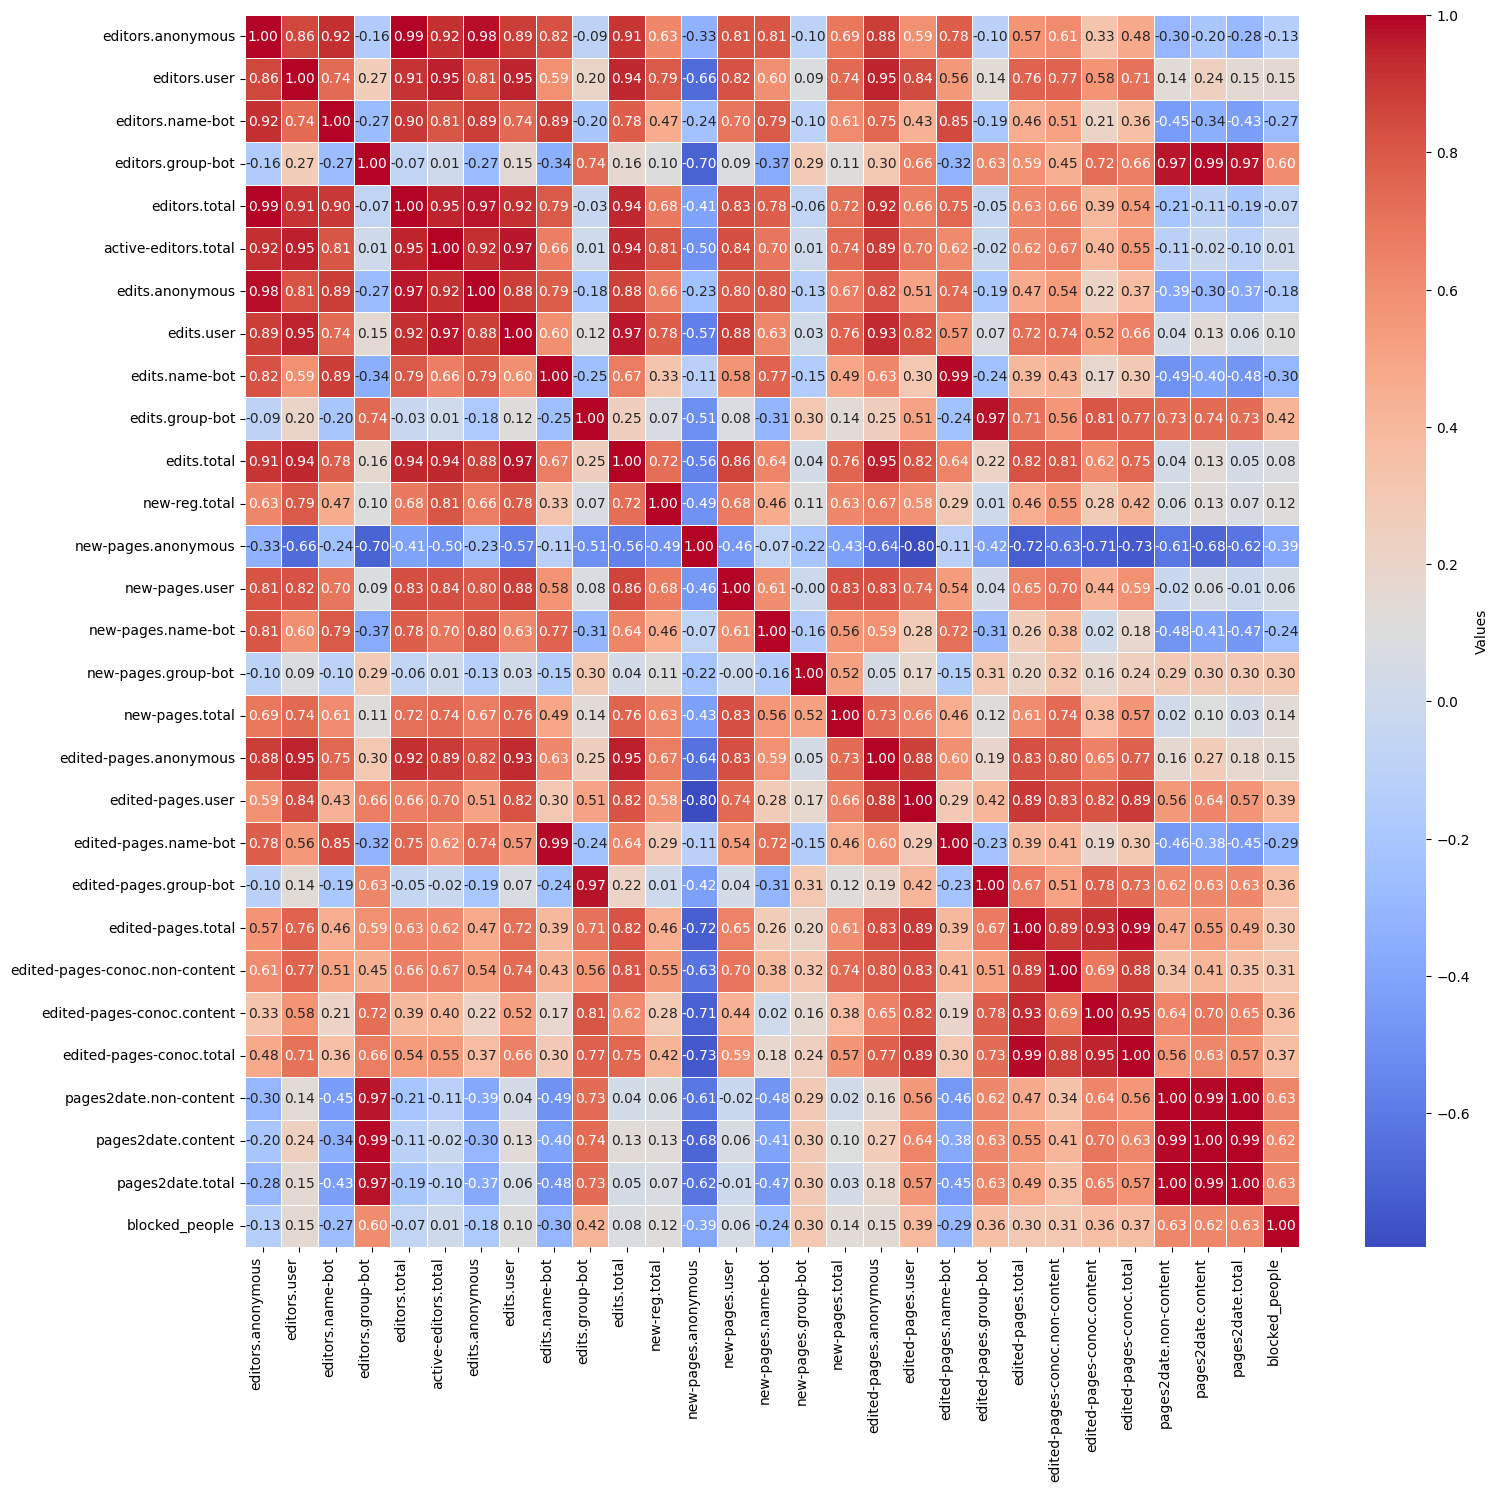

In [63]:
plt.figure(figsize=(17,16))

features = df_merged.corr().columns

# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(df_merged[features].corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Values'})

# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=90, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')
# plt.savefig('heatmap.png')
plt.show()


## **Part B.1** Section by section relationship analysis

### 1. Relationship between total blocked editors and editors

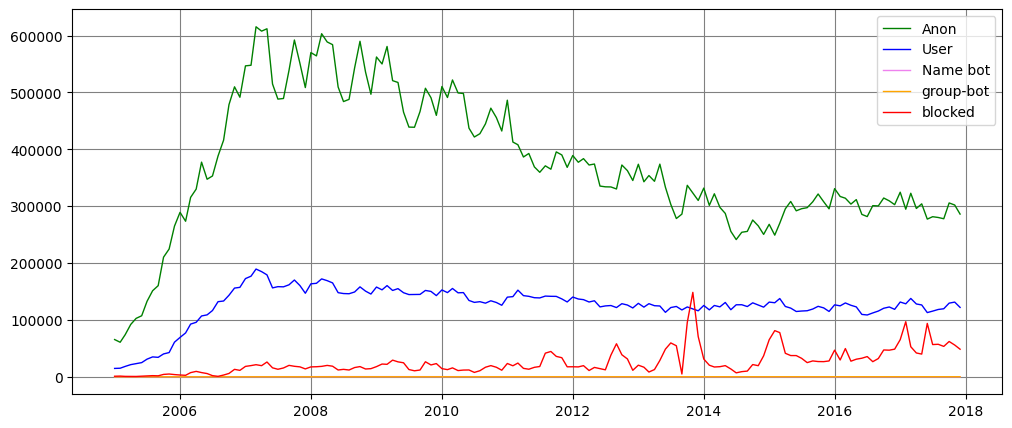

In [64]:
#line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], editors['editors.anonymous'], label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], editors['editors.user'], label = 'User', lw=1.0, color='blue')
plt.plot(df_merged['month'], editors['editors.name-bot'], label = 'Name bot', lw=1.0, color='violet')
plt.plot(df_merged['month'], editors['editors.group-bot'], label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'editors.anonymous'),
 Text(0, 1.5, 'editors.user'),
 Text(0, 2.5, 'editors.name-bot'),
 Text(0, 3.5, 'editors.group-bot'),
 Text(0, 4.5, 'editors.total'),
 Text(0, 5.5, 'blocked_people')]

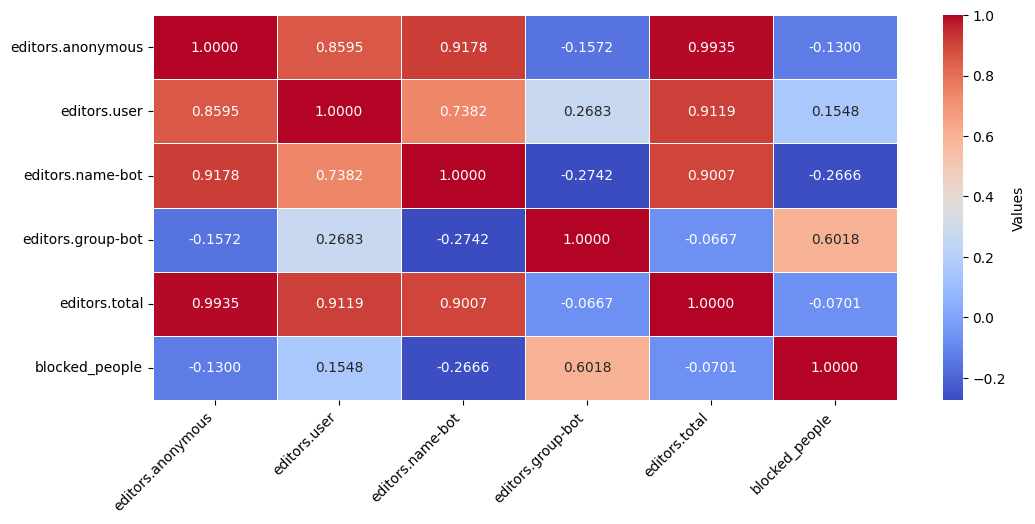

In [65]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([editors, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

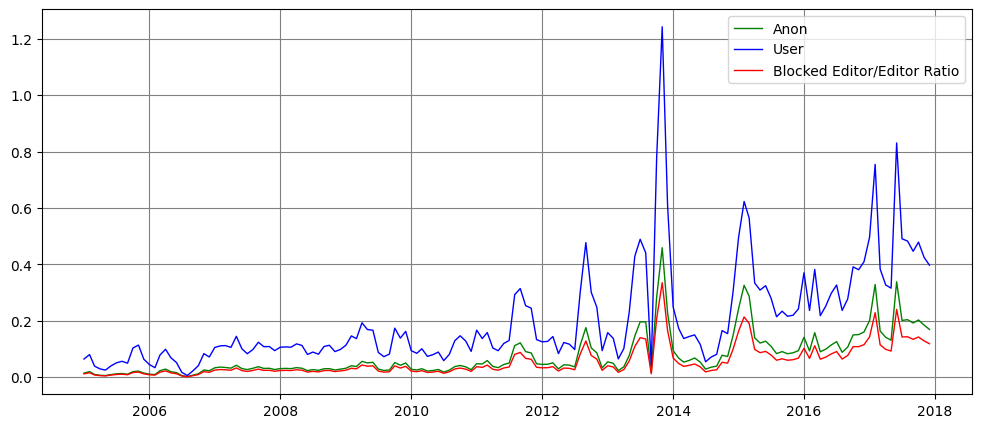

In [66]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.anonymous']),label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.user']), label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.name-bot']), label = 'name-bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.group-bot']), label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.total']), label= 'Blocked Editor/Editor Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 2. Relationship between total blocked editors and active editors

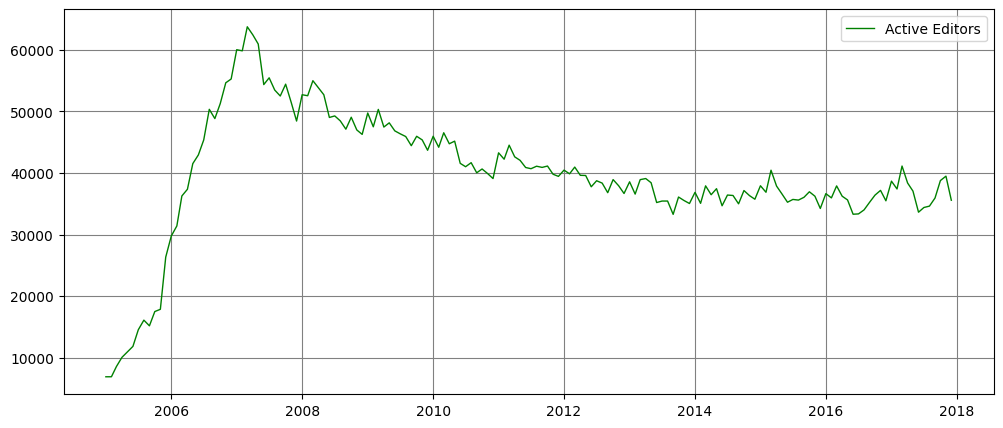

In [67]:
#line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], active_editors['active-editors.total'], label = 'Active Editors', lw=1.0, color='green')
# plt.plot(df_merged['month'], normalized_arr, label = 'Active Editors', lw=1.0, color='green')

plt.legend()
plt.show()

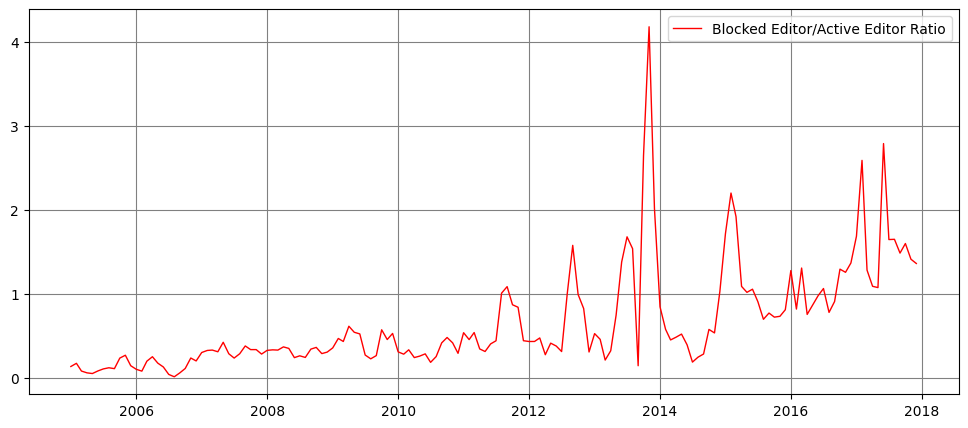

In [68]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/active_editors['active-editors.total']), label= 'Blocked Editor/Active Editor Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 3. Relationship between total blocked editors and edits

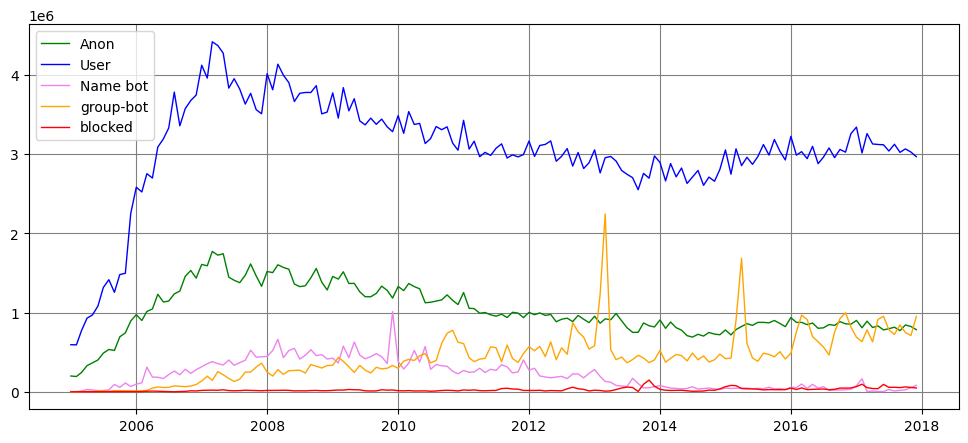

In [69]:
#line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], edits['edits.anonymous'], label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], edits['edits.user'], label = 'User', lw=1.0, color='blue')
plt.plot(df_merged['month'], edits['edits.name-bot'], label = 'Name bot', lw=1.0, color='violet')
plt.plot(df_merged['month'], edits['edits.group-bot'], label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'edits.anonymous'),
 Text(0, 1.5, 'edits.user'),
 Text(0, 2.5, 'edits.name-bot'),
 Text(0, 3.5, 'edits.group-bot'),
 Text(0, 4.5, 'edits.total'),
 Text(0, 5.5, 'blocked_people')]

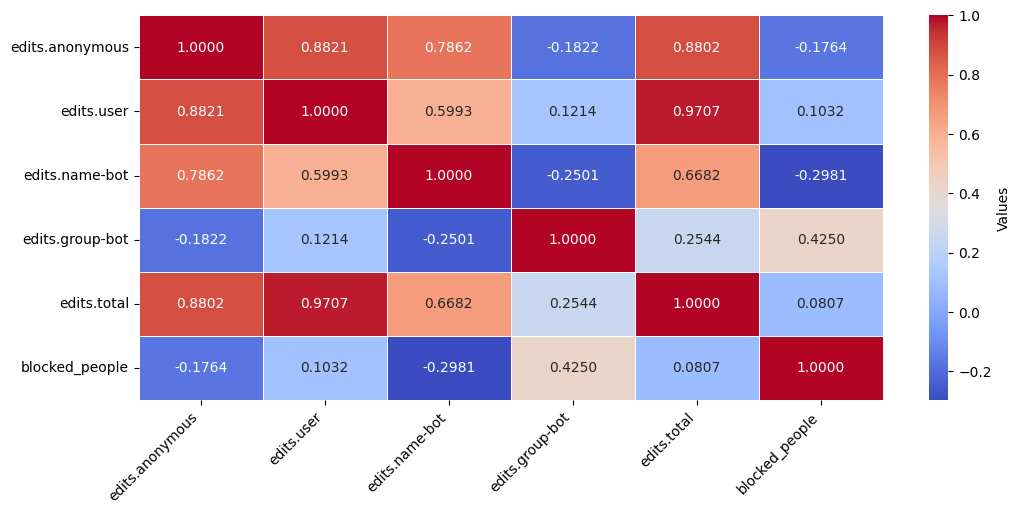

In [70]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([edits, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

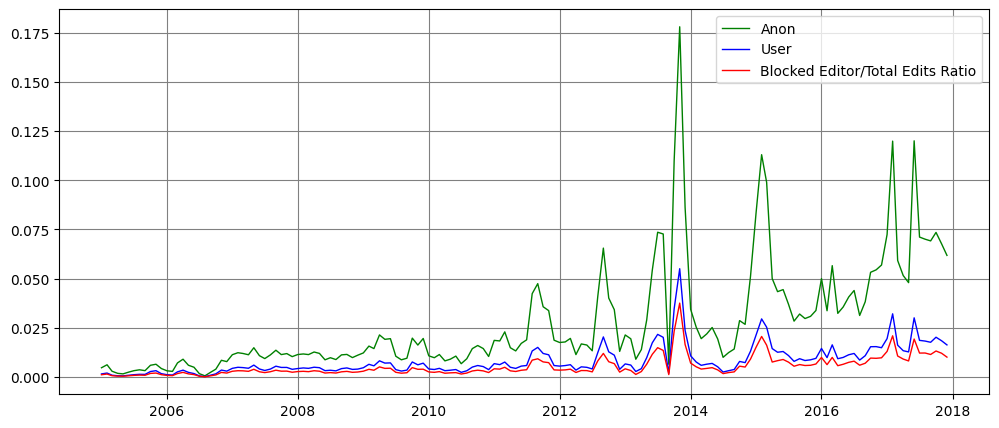

In [71]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.anonymous']),label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.user']), label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.name-bot']), label = 'name-bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.group-bot']), label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.total']), label= 'Blocked Editor/Total Edits Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 4. Relationship between total blocked editors and new registers

In [72]:
new_reg.columns

Index(['month', 'new-reg.total'], dtype='object')

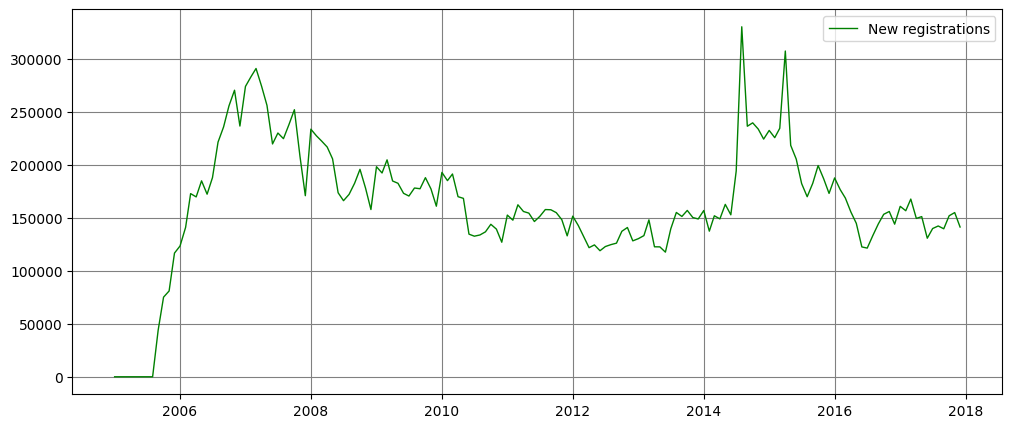

In [73]:
#line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], new_reg['new-reg.total'], label = 'New registrations', lw=1.0, color='green')

plt.legend()
plt.show()

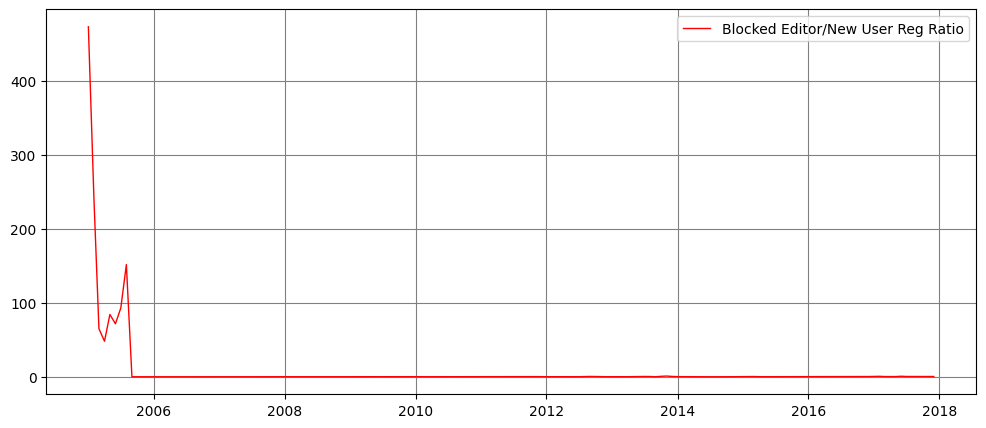

In [74]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_reg['new-reg.total']), label= 'Blocked Editor/New User Reg Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 5. Relationship between total blocked editors and new pages created

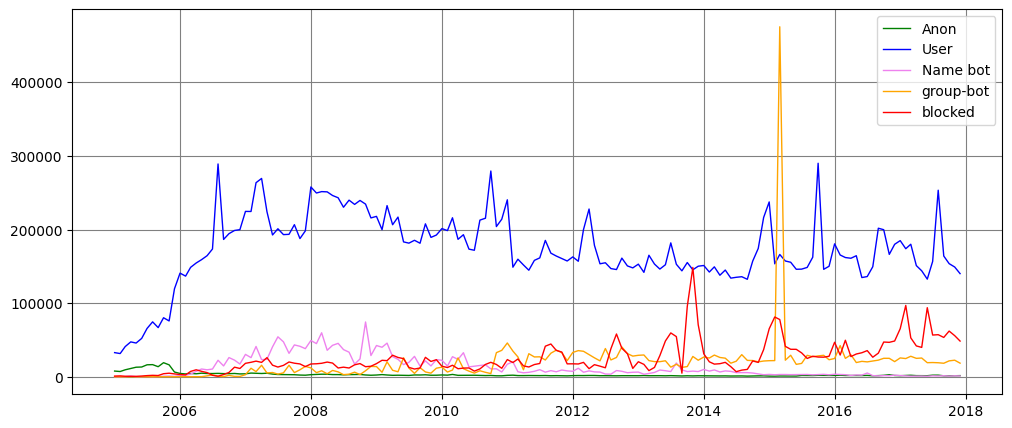

In [75]:
#line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], new_pages['new-pages.anonymous'], label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], new_pages['new-pages.user'], label = 'User', lw=1.0, color='blue')
plt.plot(df_merged['month'], new_pages['new-pages.name-bot'], label = 'Name bot', lw=1.0, color='violet')
plt.plot(df_merged['month'], new_pages['new-pages.group-bot'], label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'new-pages.anonymous'),
 Text(0, 1.5, 'new-pages.user'),
 Text(0, 2.5, 'new-pages.name-bot'),
 Text(0, 3.5, 'new-pages.group-bot'),
 Text(0, 4.5, 'new-pages.total'),
 Text(0, 5.5, 'blocked_people')]

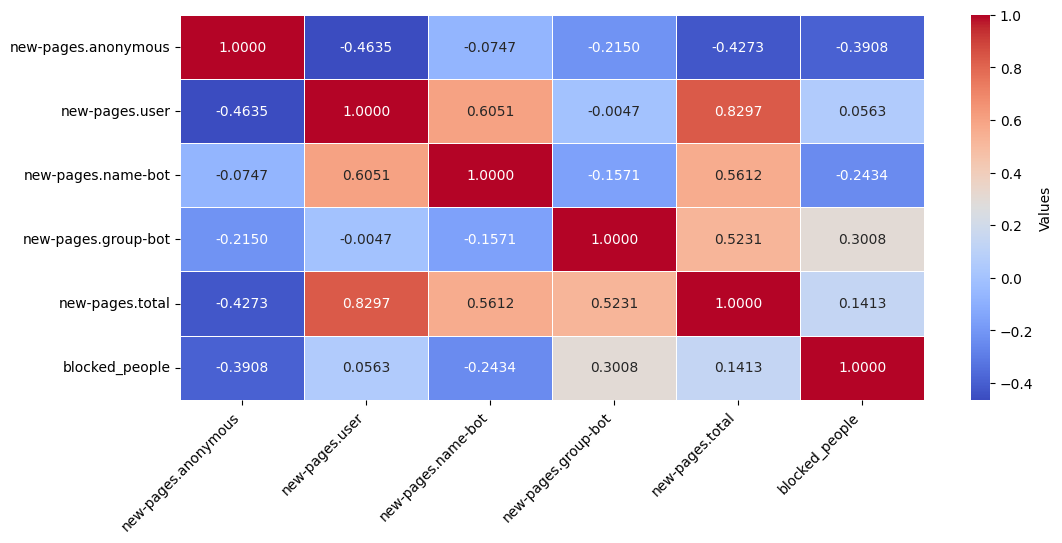

In [76]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([new_pages, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

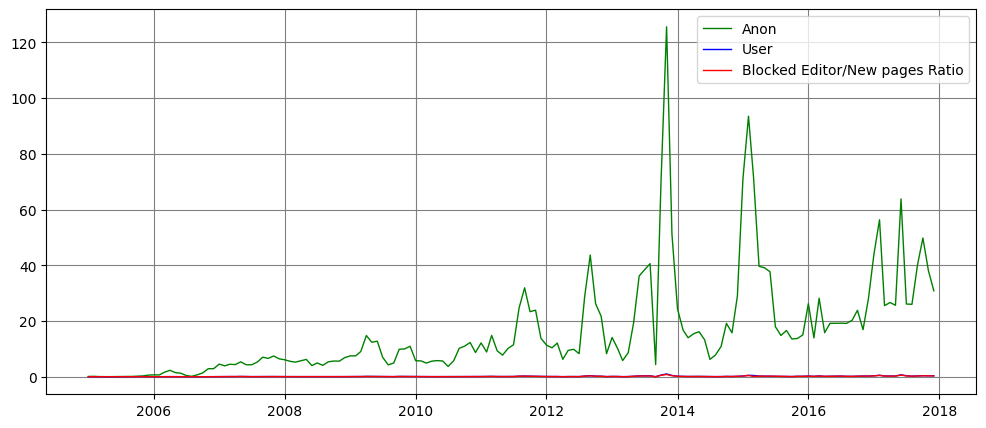

In [77]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.anonymous']),label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.user']), label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.name-bot']), label = 'name-bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.group-bot']), label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.total']), label= 'Blocked Editor/New pages Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 6. Relationship between total blocked editors and edited pages

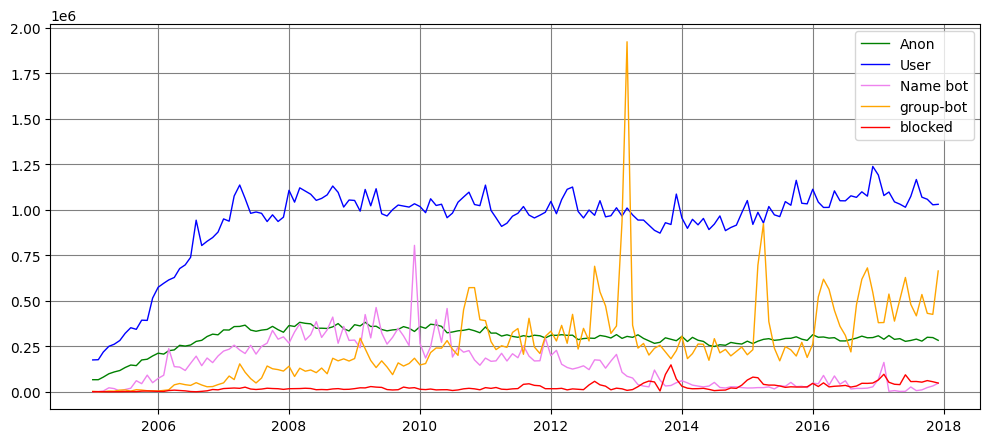

In [78]:
#line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], edited_pages['edited-pages.anonymous'], label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], edited_pages['edited-pages.user'], label = 'User', lw=1.0, color='blue')
plt.plot(df_merged['month'], edited_pages['edited-pages.name-bot'], label = 'Name bot', lw=1.0, color='violet')
plt.plot(df_merged['month'], edited_pages['edited-pages.group-bot'], label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'edited-pages.anonymous'),
 Text(0, 1.5, 'edited-pages.user'),
 Text(0, 2.5, 'edited-pages.name-bot'),
 Text(0, 3.5, 'edited-pages.group-bot'),
 Text(0, 4.5, 'edited-pages.total'),
 Text(0, 5.5, 'blocked_people')]

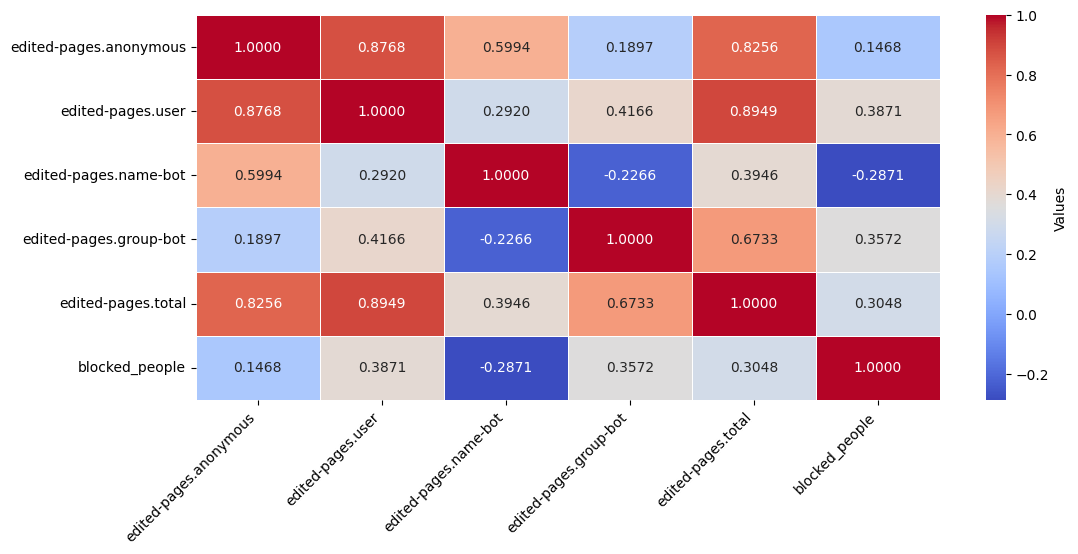

In [79]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([edited_pages, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

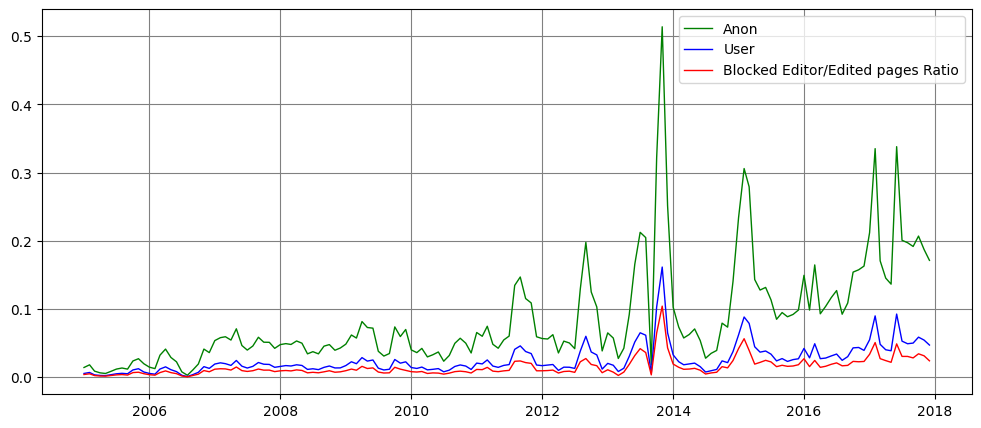

In [80]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.anonymous']),label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.user']), label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.name-bot']), label = 'name-bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.group-bot']), label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.total']), label= 'Blocked Editor/Edited pages Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 7. Relationship between total blocked editors and edited pages (content-no content)

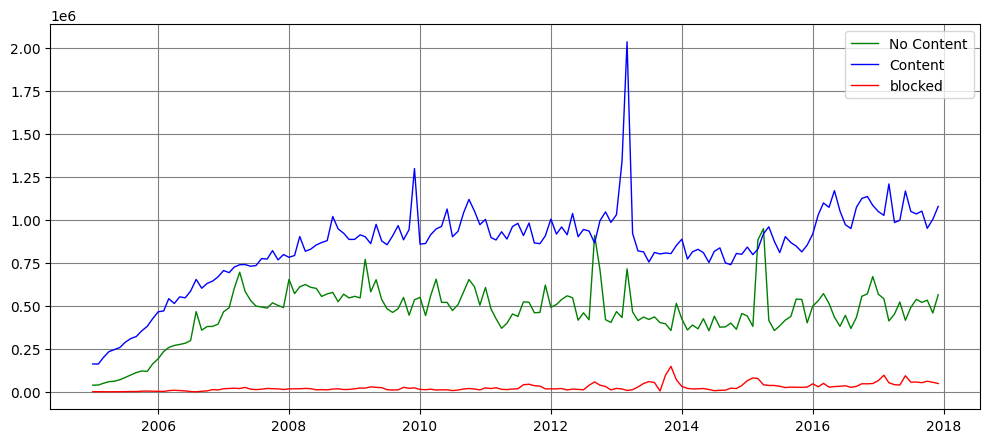

In [81]:
#line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], edited_pages_conoc['edited-pages-conoc.non-content'], label = 'No Content', lw=1.0, color='green')
plt.plot(df_merged['month'], edited_pages_conoc['edited-pages-conoc.content'], label = 'Content', lw=1.0, color='blue')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'edited-pages-conoc.non-content'),
 Text(0, 1.5, 'edited-pages-conoc.content'),
 Text(0, 2.5, 'edited-pages-conoc.total'),
 Text(0, 3.5, 'blocked_people')]

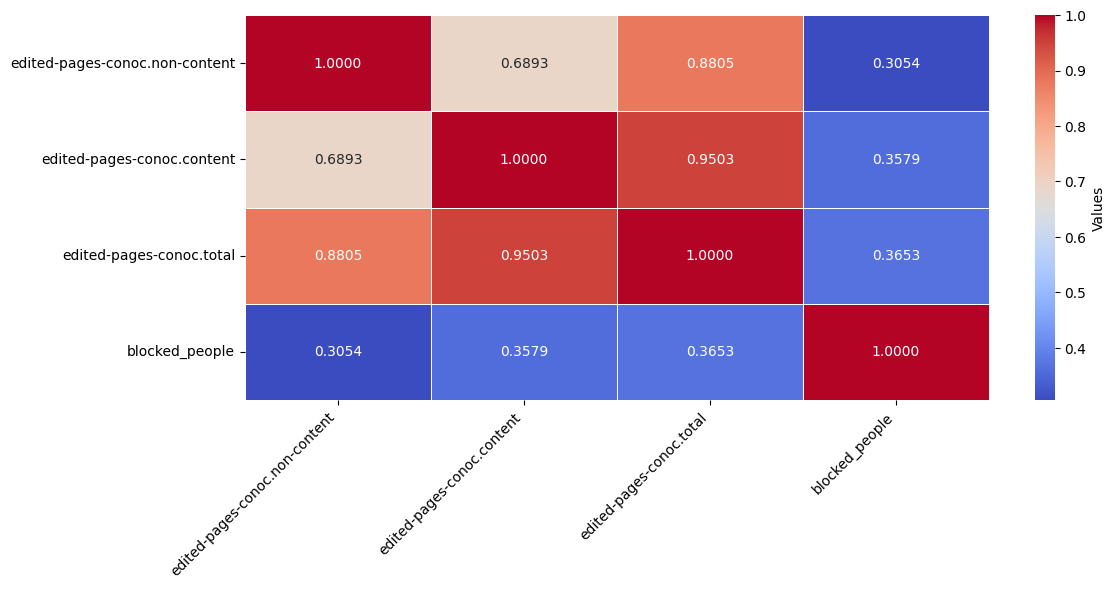

In [82]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([edited_pages_conoc, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

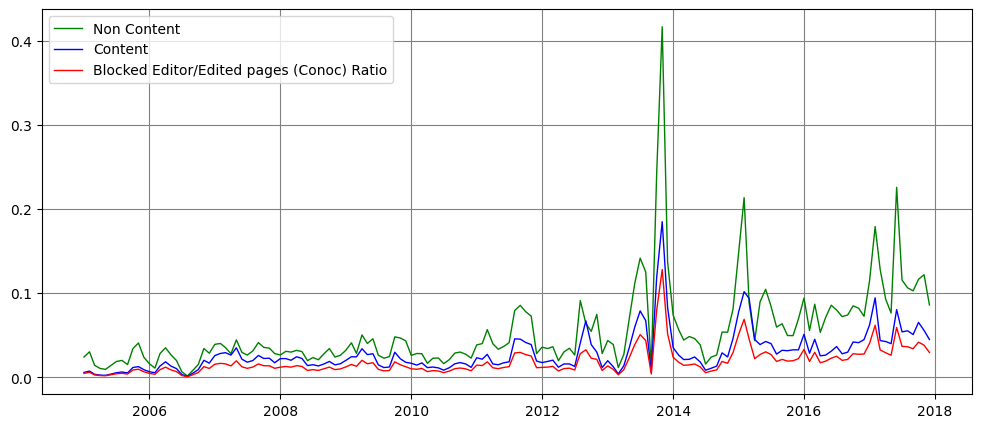

In [83]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages_conoc['edited-pages-conoc.non-content']),label = 'Non Content', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages_conoc['edited-pages-conoc.content']), label = 'Content', lw=1.0, color='blue')

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages_conoc['edited-pages-conoc.total']), label= 'Blocked Editor/Edited pages (Conoc) Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 8. Relationship between total blocked editors and pages to date (content-no content)

In [84]:
pages2date.columns

Index(['month', 'pages2date.non-content', 'pages2date.content',
       'pages2date.total'],
      dtype='object')

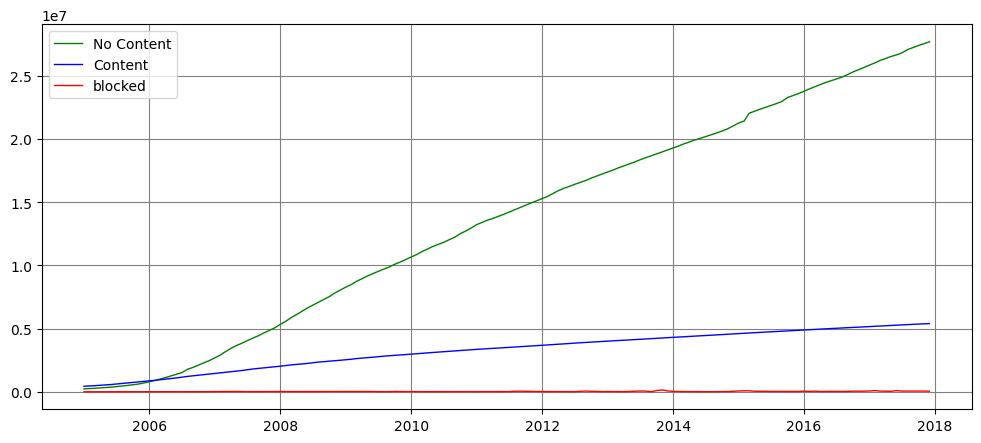

In [85]:
#line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], pages2date['pages2date.non-content'], label = 'No Content', lw=1.0, color='green')
plt.plot(df_merged['month'], pages2date['pages2date.content'], label = 'Content', lw=1.0, color='blue')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'pages2date.non-content'),
 Text(0, 1.5, 'pages2date.content'),
 Text(0, 2.5, 'pages2date.total'),
 Text(0, 3.5, 'blocked_people')]

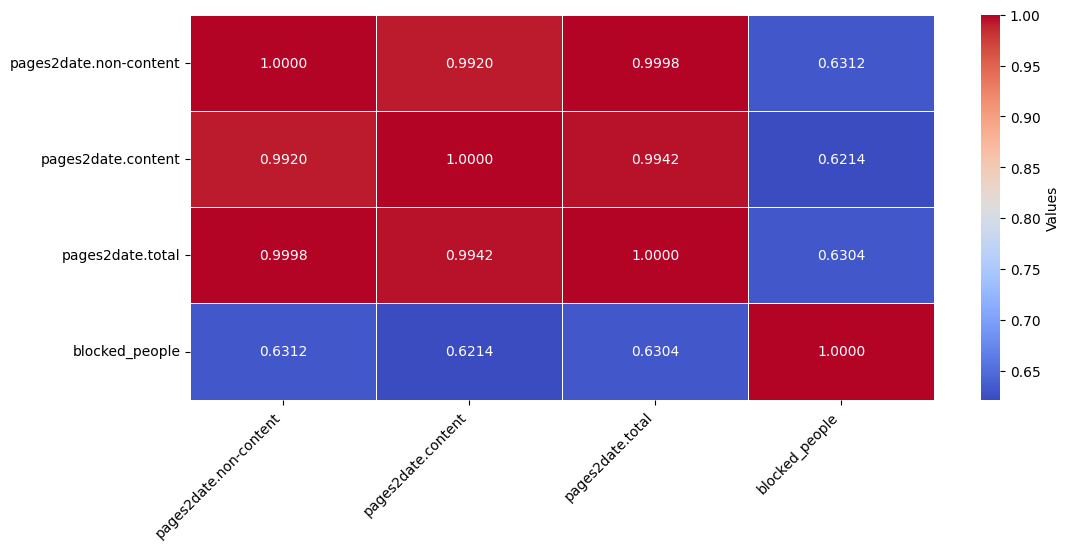

In [86]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([pages2date, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

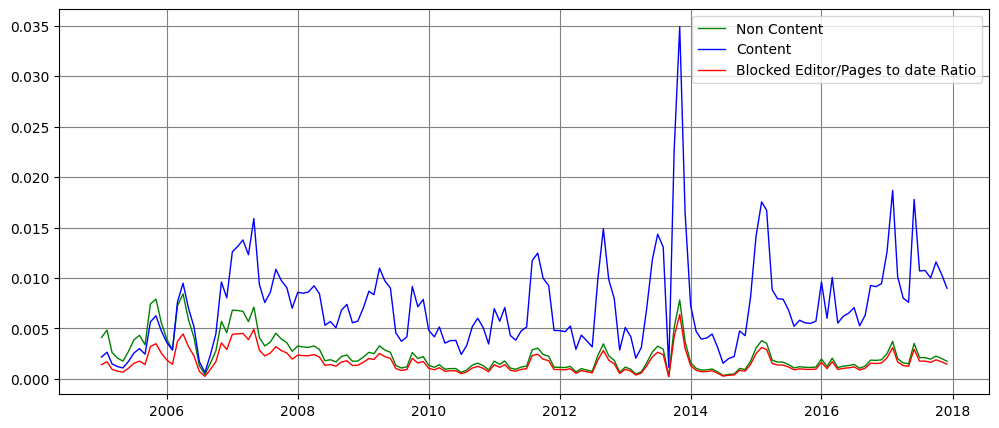

In [87]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/pages2date['pages2date.non-content']),label = 'Non Content', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/pages2date['pages2date.content']), label = 'Content', lw=1.0, color='blue')

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/pages2date['pages2date.total']), label= 'Blocked Editor/Pages to date Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

## **Part B.2:** Development of scoring function

In [88]:
edited_pages.columns

Index(['month', 'edited-pages.anonymous', 'edited-pages.user',
       'edited-pages.name-bot', 'edited-pages.group-bot',
       'edited-pages.total'],
      dtype='object')

In [89]:
# blocked to anon. editros
A = np.array(blocked_account['blocked_people']/editors['editors.anonymous'])
A = preprocessing.normalize([A], norm='max')
A = A.transpose()

# blocked to user editors
B = np.array(blocked_account['blocked_people']/editors['editors.user'])
B = preprocessing.normalize([B], norm='max')
B = B.transpose()

# blocked to active editors
C = np.array(blocked_account['blocked_people']/active_editors['active-editors.total'])
C = preprocessing.normalize([C], norm='max')
C = C.transpose()

# blocks to anon. edits
D = np.array(blocked_account['blocked_people']/edits['edits.anonymous'])
D = preprocessing.normalize([D], norm='max')
D = D.transpose()

# blocks to user edits
E = np.array(blocked_account['blocked_people']/edits['edits.user'])
E = preprocessing.normalize([E], norm='max')
E = E.transpose()

# blocks to anon. new page creations
F = np.array(blocked_account['blocked_people']/new_pages['new-pages.anonymous'])
F = preprocessing.normalize([F], norm='max')
F = F.transpose()

# blocks to user new page creations
G = np.array(blocked_account['blocked_people']/new_pages['new-pages.user'])
G = preprocessing.normalize([G], norm='max')
G = G.transpose()

# blocks to anon. new page edits
H = np.array(blocked_account['blocked_people']/edited_pages['edited-pages.anonymous'])
H = preprocessing.normalize([H], norm='max')
H = H.transpose()

# blocks to user new page edits
I = np.array(blocked_account['blocked_people']/edited_pages['edited-pages.user'])
I = preprocessing.normalize([I], norm='max')
I = I.transpose()


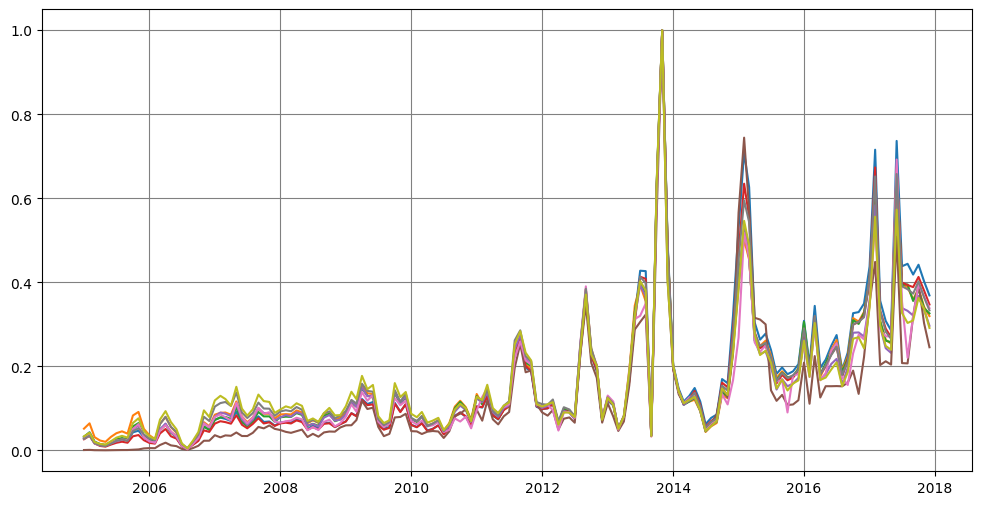

In [90]:
plt.figure(figsize=(12,6))

plt.plot(df_merged['month'], A)
plt.plot(df_merged['month'], B)
plt.plot(df_merged['month'], C)
plt.plot(df_merged['month'], D)
plt.plot(df_merged['month'], E)
plt.plot(df_merged['month'], F)
plt.plot(df_merged['month'], G) 
plt.plot(df_merged['month'], H)
plt.plot(df_merged['month'], I)

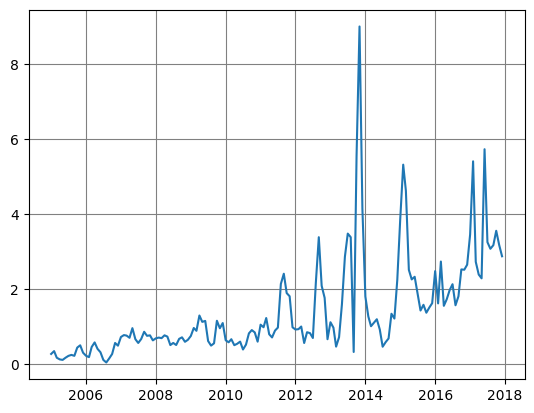

In [91]:
interaction_score = A+B+C+D+E+F+G+H+I
plt.plot(df_merged['month'], interaction_score)

# Part C: Hypothesis Testing & Stat. Analysis
## H1: We expect the total number of blocks (normalized) to diminish over time.

In [92]:
df_editors_filtered.head()

,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,65476,14694,18.0,2.0
1,2005-02-01,60723,15056,28.0,2.0
2,2005-03-01,74055,18243,29.0,2.0
3,2005-04-01,92101,21373,31.0,2.0
4,2005-05-01,102733,23181,35.0,4.0


In [93]:
# df_editors_filtered['total.total'] = df_editors_filtered[['total.anonymous', 'total.user', 'total.name-bot', 'total.group-bot']].sum(axis=1)

# df_editors_filtered.head()

In [94]:
df_active_editors.head()

,month,total.total
0,2005-01-01,6871
1,2005-02-01,6872
2,2005-03-01,8543
3,2005-04-01,10039
4,2005-05-01,10911


In [95]:
# df_edit_editors_04_07_copy = df_edit_editors_04_07
# df_edit_editors_04_07_copy.head()

In [96]:
# df_edit_editors_04_07_copy['month'] = pd.to_datetime(df_edit_editors_04_07_copy['month'])

# df_edit_editors_04_07_copy = df_edit_editors_04_07_copy[df_edit_editors_04_07_copy['month'] >= '2005-01-01']
# df_edit_editors_04_07_copy = df_edit_editors_04_07[df_edit_editors_04_07['month'] <= '2017-12-31']
# df_edit_editors_04_07_copy.head()


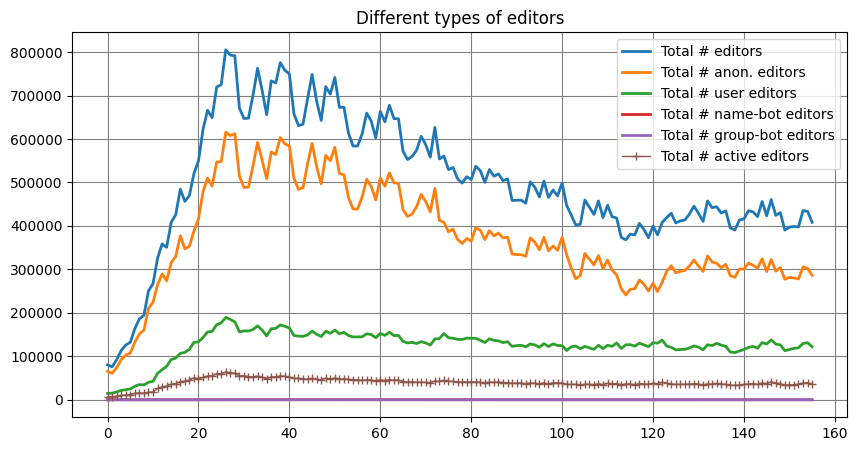

In [97]:
plt.figure(figsize=(10,5))
plt.title("Different types of editors")
plt.plot(df_editors_filtered['total.anonymous']+df_editors_filtered['total.user']+df_editors_filtered['total.name-bot']+df_editors_filtered['total.group-bot'], label="Total # editors", lw = 2.0)
plt.plot(df_editors_filtered['total.anonymous'], label= 'Total # anon. editors', lw=2.0)
plt.plot(df_editors_filtered['total.user'], label= 'Total # user editors', lw=2.0)
plt.plot(df_editors_filtered['total.name-bot'], label= 'Total # name-bot editors', lw=2.0)
plt.plot(df_editors_filtered['total.group-bot'], label= 'Total # group-bot editors', lw=2.0)
plt.plot(df_active_editors['total.total'], label='Total # active editors', marker="+", lw=1.0)
plt.legend()

In [98]:
df_edits_filtered.head()

,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,199826,594798,1923.0,3160.0
1,2005-02-01,193228,592628,2128.0,1364.0
2,2005-03-01,242362,770234,9740.0,1728.0
3,2005-04-01,329974,929123,29911.0,4866.0
4,2005-05-01,365311,969462,24931.0,4664.0


In [99]:
new_col = df_edits_filtered[['total.anonymous', 'total.user', 'total.name-bot', 'total.group-bot']].sum(axis=1)
new_col

0       799707.0
1       789348.0
2      1024064.0
3      1293874.0
4      1364368.0
         ...    
151    4675004.0
152    4655952.0
153    4684372.0
154    4611795.0
155    4785221.0
Length: 156, dtype: float64

In [100]:
df_edited_pages.head()

,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,66918,175598,1268.0,2970.0
1,2005-02-01,66906,176741,1538.0,1205.0
2,2005-03-01,81284,219188,4975.0,1618.0
3,2005-04-01,99532,250281,22458.0,4557.0
4,2005-05-01,109594,261928,18046.0,3975.0


In [101]:
df_edited_pages_conoc.head()

,month,total.non-content,total.content
0,2005-01-01,38977,162240
1,2005-02-01,39771,161811
2,2005-03-01,49885,198997
3,2005-04-01,59181,233517
4,2005-05-01,62047,245289


In [102]:
df_new_reg

,month,total.total
0,2005-01-01,2
1,2005-02-01,5
2,2005-03-01,11
3,2005-04-01,13
4,2005-05-01,7
...,...,...
151,2017-08-01,142303
152,2017-09-01,139666
153,2017-10-01,151935
154,2017-11-01,154954


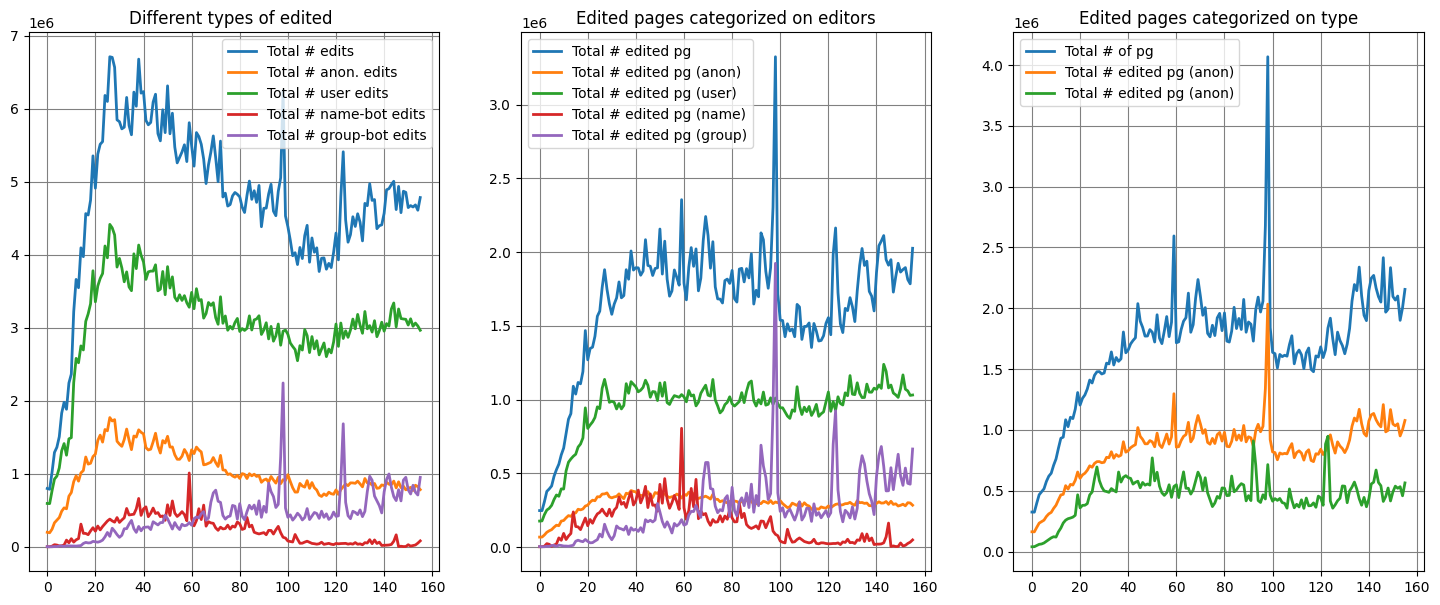

In [103]:
fig = plt.figure(figsize=(18, 7))
gs = gridspec.GridSpec(1, 3)

ax1 = plt.subplot(gs[0, 0])
ax1.set_title("Different types of edited ")
# plt.title("Different types of edits")

plt.plot(new_col, label = "Total # edits", lw= 2.0) 
plt.plot(df_edits_filtered['total.anonymous'], label= 'Total # anon. edits', lw=2.0)
plt.plot(df_edits_filtered['total.user'], label= 'Total # user edits', lw=2.0)
plt.plot(df_edits_filtered['total.name-bot'], label= 'Total # name-bot edits', lw=2.0)
plt.plot(df_edits_filtered['total.group-bot'], label= 'Total # group-bot edits', lw=2.0)
plt.legend()

# ax2 = plt.subplot(gs[0, 1])
# ax2.set_title("Different types of editor")
# plt.plot(df_editors_filtered['total.anonymous']+df_editors_filtered['total.user']+df_editors_filtered['total.name-bot']+df_editors_filtered['total.group-bot'], label="Total # editors", lw = 2.0)
# plt.plot(df_editors_filtered['total.anonymous'], label= 'Total # anon. editors', lw=2.0)
# plt.plot(df_editors_filtered['total.user'], label= 'Total # user editors', lw=2.0)
# plt.plot(df_editors_filtered['total.name-bot'], label= 'Total # name-bot editors', lw=2.0)
# plt.plot(df_editors_filtered['total.group-bot'], label= 'Total # group-bot editors', lw=2.0)
# plt.plot(df_active_editors['total.total'], label='Total # active editors', marker="+", lw=1.0)
# plt.legend()

ax2 = plt.subplot(gs[0, 1])
ax2.set_title("Edited pages categorized on editors")
plt.plot(df_edited_pages['total.anonymous']+df_edited_pages['total.user']+df_edited_pages['total.name-bot']+df_edited_pages['total.group-bot'], label="Total # edited pg", lw = 2.0)
plt.plot(df_edited_pages['total.anonymous'], label= 'Total # edited pg (anon)', lw=2.0)
plt.plot(df_edited_pages['total.user'], label= 'Total # edited pg (user)', lw=2.0)
plt.plot(df_edited_pages['total.name-bot'], label= 'Total # edited pg (name)', lw=2.0)
plt.plot(df_edited_pages['total.group-bot'], label= 'Total # edited pg (group)', lw=2.0)
plt.legend()

ax3 = plt.subplot(gs[0, 2])
ax3.set_title("Edited pages categorized on type")
plt.plot(df_edited_pages_conoc['total.content']+df_edited_pages_conoc['total.content'], label="Total # of pg", lw = 2.0)
plt.plot(df_edited_pages_conoc['total.content'], label= 'Total # edited pg (anon)', lw=2.0)
plt.plot(df_edited_pages_conoc['total.non-content'], label= 'Total # edited pg (anon)', lw=2.0)
plt.legend()

In [104]:
df_edited_pages.head()

,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,66918,175598,1268.0,2970.0
1,2005-02-01,66906,176741,1538.0,1205.0
2,2005-03-01,81284,219188,4975.0,1618.0
3,2005-04-01,99532,250281,22458.0,4557.0
4,2005-05-01,109594,261928,18046.0,3975.0


In [105]:
new_col = df_edited_pages[['total.anonymous', 'total.user', 'total.name-bot', 'total.group-bot']].sum(axis=1)
new_col

0       246754.0
1       246390.0
2       307065.0
3       376828.0
4       393543.0
         ...    
151    1881663.0
152    1894853.0
153    1813868.0
154    1784813.0
155    2025909.0
Length: 156, dtype: float64

In [106]:
df_edited_pages_conoc.head()

,month,total.non-content,total.content
0,2005-01-01,38977,162240
1,2005-02-01,39771,161811
2,2005-03-01,49885,198997
3,2005-04-01,59181,233517
4,2005-05-01,62047,245289


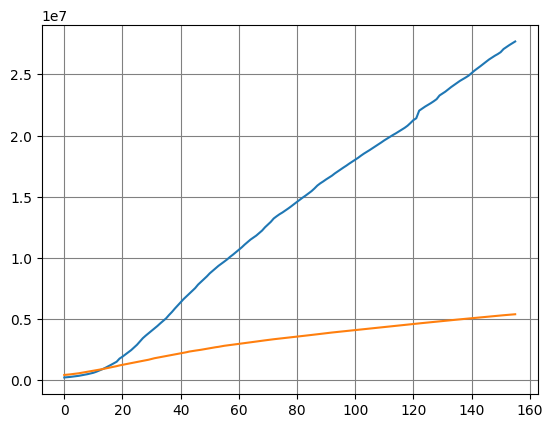

In [107]:
df_pages2date.head()
plt.plot(df_pages2date['total.non-content'])
plt.plot(df_pages2date['total.content'])

### At first we start with the block_log_data_cleaned.csv 

In [108]:
df['action'].value_counts()

block      4067771
reblock      68608
unblock      66247
Name: action, dtype: int64

### Creating a dataframe which has only "block" in the **<i>action</i>** column

In [109]:
# keeping only block events 
df_blocked_account = df[df['action'] == 'block']

# watching the shape after removing non-block rows 
print(df_blocked_account.shape)
df_blocked_account.head()

(4067771, 8)


,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,[],NaN
2,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,[],NaN
3,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,[],NaN
4,166.121.36.7,block,CryptoDerk,2004-12-23,"repeated repeated warnings, continued vandalism",infinity,[],NaN
5,68.210.228.209,block,CryptoDerk,2004-12-23,repeated warnings,infinity,[],NaN


### Modifying the dataframe where in the **<i>title</i>** column, only unique blocked users are grouped by month


In [110]:
# get unique titles
df_blocked_account = df_blocked_account.groupby(pd.PeriodIndex(df_blocked_account['timestamp'], freq="M"))['title'].apply(lambda x: len(x.unique()))
print(df_blocked_account.shape)

# resetting the index so indexing starts at 0
df_blocked_account = df_blocked_account.reset_index()

# converting the timestamp column in proper format
df_blocked_account['timestamp'] = df_blocked_account['timestamp'].dt.to_timestamp()

# changing the column name 
df_blocked_account = df_blocked_account.rename(columns={"title": "blocked_people"})

# updating monthly blocked dataframe by keeping values from 2005 and onwards
df_blocked_account = df_blocked_account[df_blocked_account['timestamp'] >= '2005-01-01']

# # resetting index so starts at 0
df_blocked_account.reset_index(drop=True, inplace=True)

# seeing data
print(df_blocked_account.shape)
df_blocked_account.head()

(157,)
(156, 2)


,timestamp,blocked_people
0,2005-01-01,947
1,2005-02-01,1207
2,2005-03-01,715
3,2005-04-01,625
4,2005-05-01,590


### Checking if the row numbers of the dataframe we want to join matches

In [111]:
if len(df_edit_editors_04_07) != len(df_blocked_account):
    print("data time frame ERROR")
else:
    print(len(df_edit_editors_04_07))

156


In [112]:
result = pd.concat([df_edit_editors_04_07, df_blocked_account], axis=1, join="inner")
result = result.drop(columns = 'timestamp')
result.head()

,month,edits,editors,blocked_people
0,2005-01-01,800186,80201,947
1,2005-02-01,789780,75824,1207
2,2005-03-01,1024707,92355,715
3,2005-04-01,1294737,113549,625
4,2005-05-01,1365329,125997,590


### Calculating % of blocked user on the formula ((total blocked people) * 100 )/ total editors
But its actually blocked people vs editor ratio, scaled to 100?

In [113]:
result['%_bl_users'] = (result['blocked_people']*100)/result['editors']
# result['%_bl_users'] = result['%_bl_users'].round(0)

In [114]:
result.head()

,month,edits,editors,blocked_people,%_bl_users
0,2005-01-01,800186,80201,947,1.180783
1,2005-02-01,789780,75824,1207,1.591844
2,2005-03-01,1024707,92355,715,0.774187
3,2005-04-01,1294737,113549,625,0.550423
4,2005-05-01,1365329,125997,590,0.468265


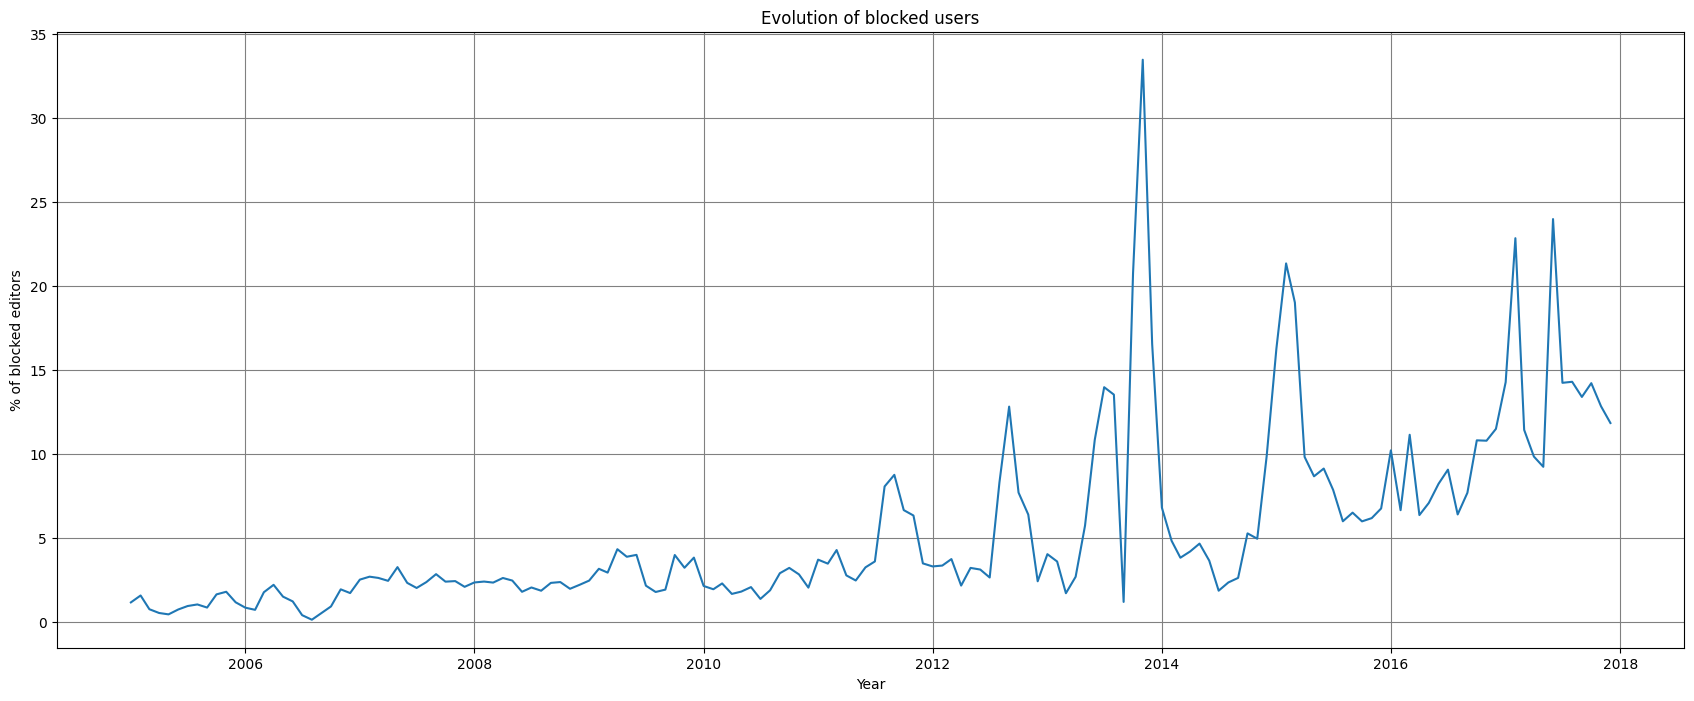

In [115]:
x1 = result['month']
y1 = result['%_bl_users']
title = "Evolution of blocked users"
xlabel = "Year"
ylabel = "% of blocked editors"
show_plot_1(result['month'], result['%_bl_users'], title, xlabel, ylabel)

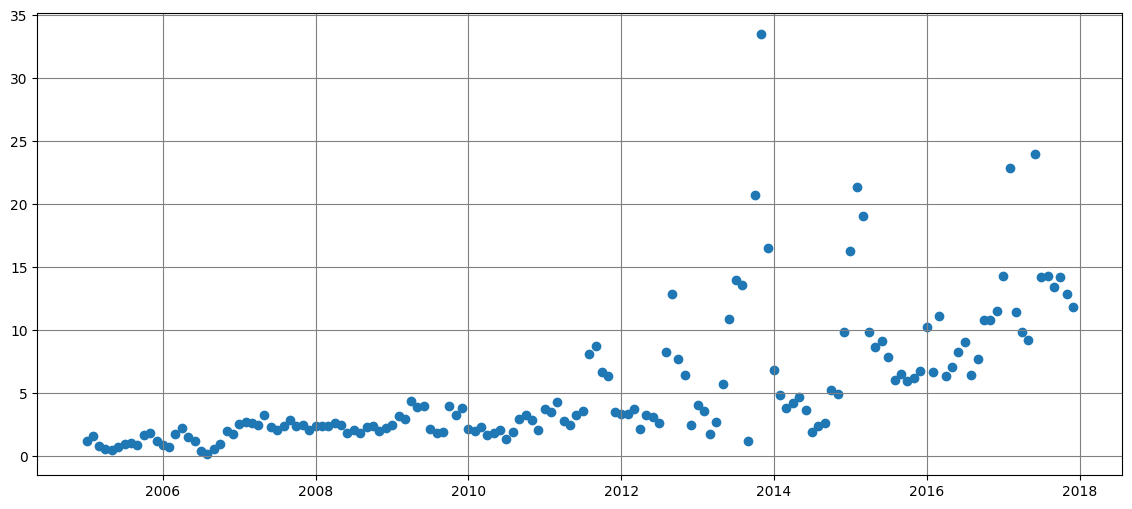

In [116]:
plt.figure(figsize=(14,6))
plt.scatter(result['month'], result['%_bl_users'])

In [117]:
freq_policies_monthly.head()

,month,nb_policies
0,2005-01-01,28
1,2005-02-01,28
2,2005-03-01,28
3,2005-04-01,29
4,2005-05-01,29


In [118]:
result_rn = freq_policies_monthly.rename(columns={"month": "date"})
df1 = result
df4 = result_rn
result_h1 = pd.concat([df1, df4], axis=1, join="inner")
result_h1 = result_h1.drop(columns = 'date')

In [119]:
result_h1.head()

,month,edits,editors,blocked_people,%_bl_users,nb_policies
0,2005-01-01,800186,80201,947,1.180783,28
1,2005-02-01,789780,75824,1207,1.591844,28
2,2005-03-01,1024707,92355,715,0.774187,28
3,2005-04-01,1294737,113549,625,0.550423,29
4,2005-05-01,1365329,125997,590,0.468265,29


In [120]:
result_h1.tail()

,month,edits,editors,blocked_people,%_bl_users,nb_policies
151,2017-08-01,4686591,399409,57155,14.309893,58
152,2017-09-01,4666223,398494,53433,13.408734,58
153,2017-10-01,4696462,436203,62062,14.227779,58
154,2017-11-01,4622820,434451,55841,12.853233,59
155,2017-12-01,4797589,409054,48495,11.855403,59


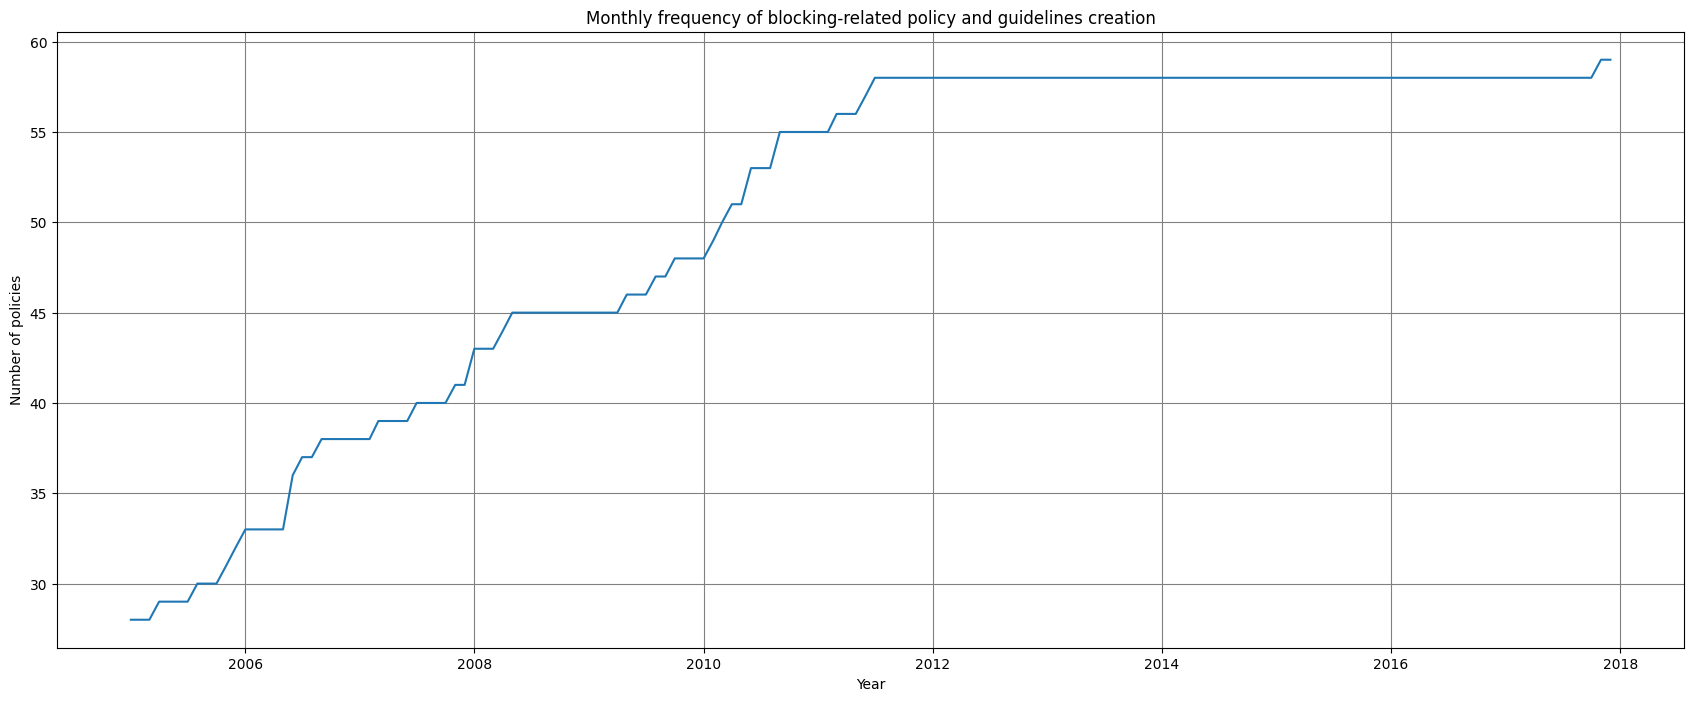

In [121]:
x2 = result_h1['month']
y2 = result_h1['nb_policies']

title = "Monthly frequency of blocking-related policy and guidelines creation"
xlabel = "Year"
ylabel = "Number of policies"
show_plot_1(x2, y2, title, xlabel, ylabel)

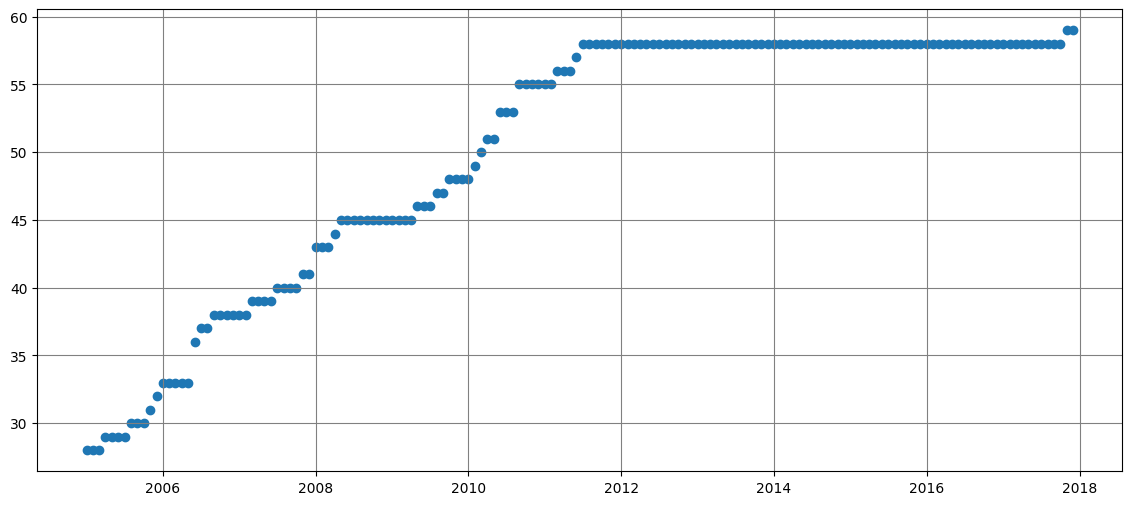

In [122]:
plt.figure(figsize=(14,6))
plt.scatter(result_h1['month'], result_h1['nb_policies'])

In [123]:
# print(result_h1['month'])
print(result_h1['nb_policies'])

0      28
1      28
2      28
3      29
4      29
       ..
151    58
152    58
153    58
154    59
155    59
Name: nb_policies, Length: 156, dtype: int64


Monthly % of blocked editors (users) from total number of editors per that time - **date**

In [124]:
policies = result_h1['nb_policies']
blocked_users =  result_h1['%_bl_users']

policies = np.float64((np.array(policies)))
blocked_users = np.float64((np.array(blocked_users)))

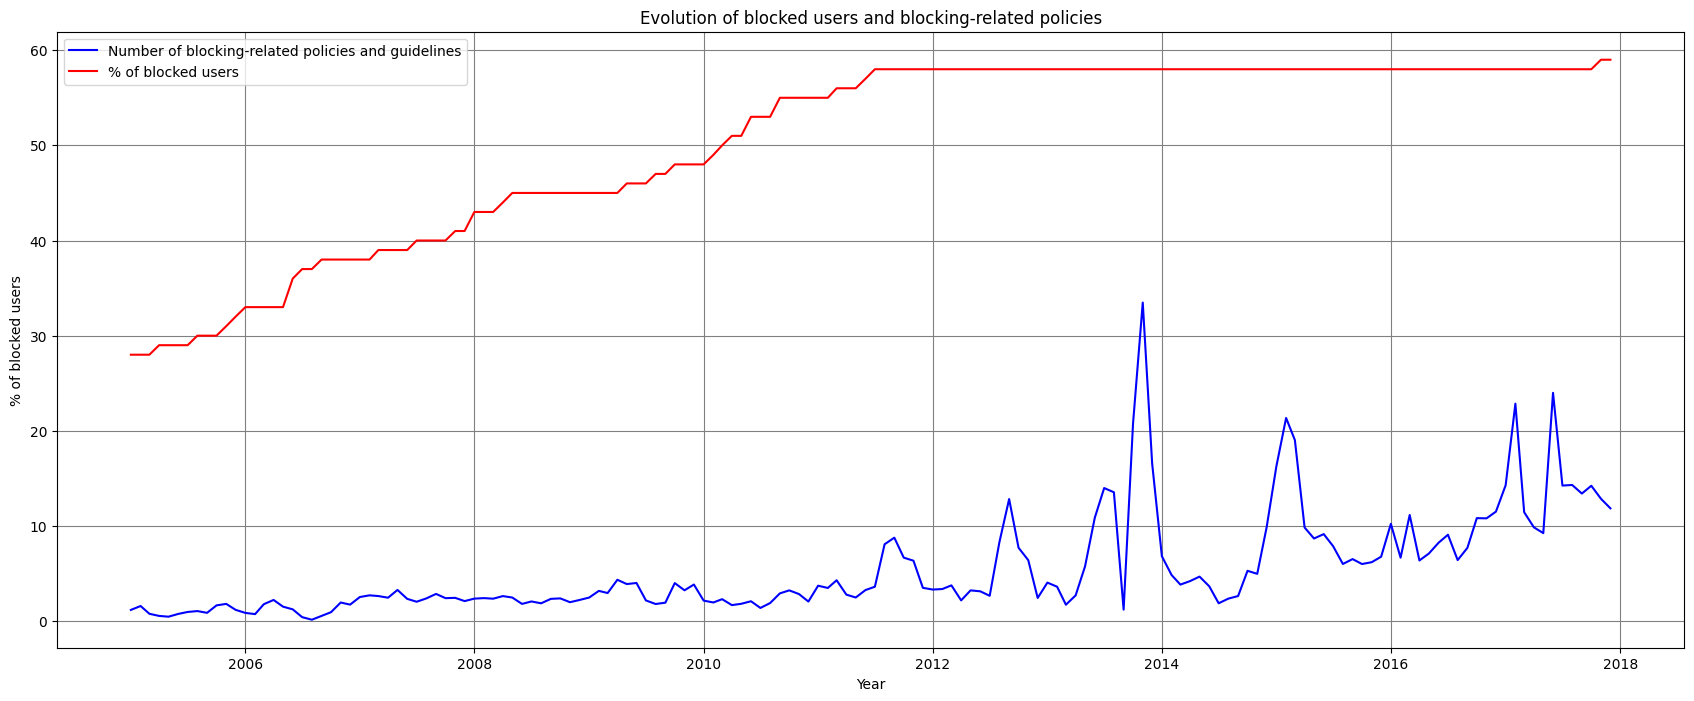

In [125]:
title = "Evolution of blocked users and blocking-related policies"
xlabel = "Year"
ylabel = "% of blocked users"
legend_1 = "Number of blocking-related policies and guidelines" #Blue
legend_2 = "% of blocked users" #Red
show_plot_2(x1, y1, x2, y2, title, xlabel, ylabel, legend_1, legend_2)

Text(0.5, 1.0, 'Scatterplot between two variables of concern')

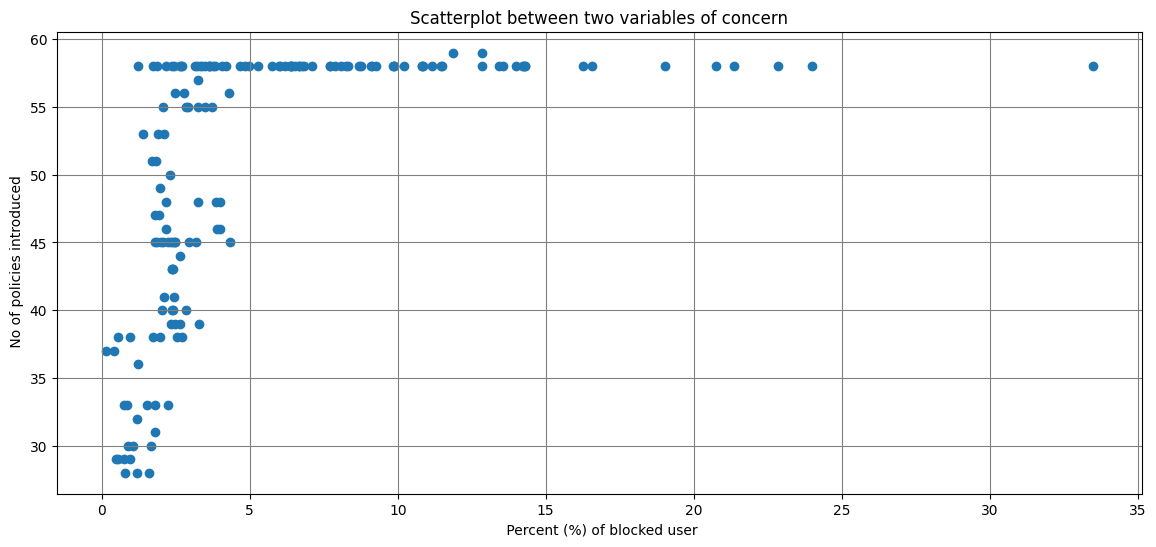

In [126]:
plt.figure(figsize=(14,6))
plt.scatter(result_h1['%_bl_users'], (result_h1['nb_policies']))
plt.xlabel(" Percent (%) of blocked user")
plt.ylabel(" No of policies introduced")
plt.title("Scatterplot between two variables of concern")

Text(0.5, 1.0, 'Scatterplot between two variables of concern')

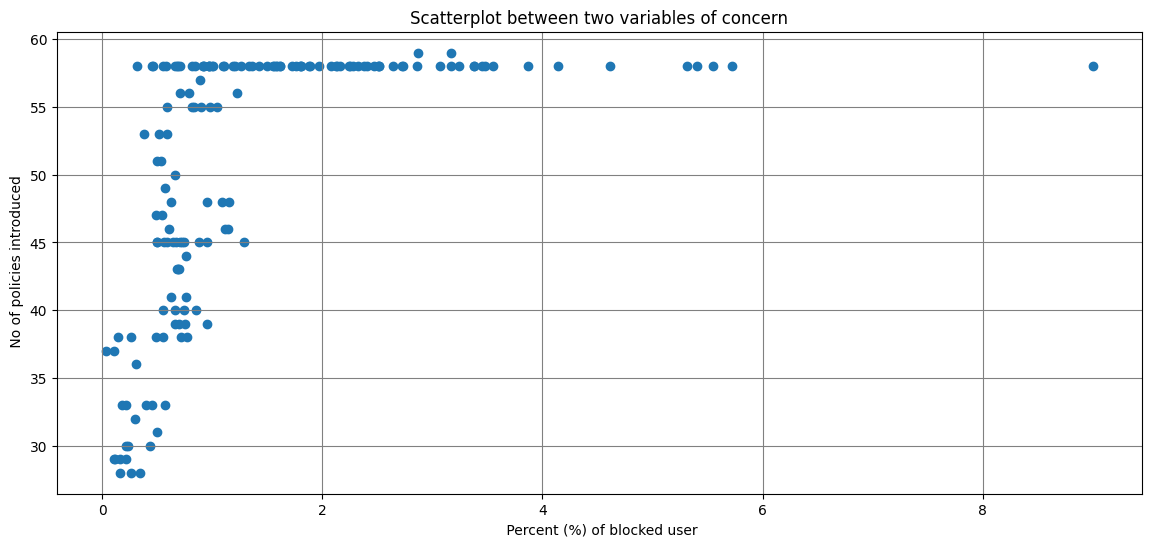

In [127]:
plt.figure(figsize=(14,6))
plt.scatter(interaction_score, (result_h1['nb_policies']))
plt.xlabel(" Percent (%) of blocked user")
plt.ylabel(" No of policies introduced")
plt.title("Scatterplot between two variables of concern")

<AxesSubplot:>

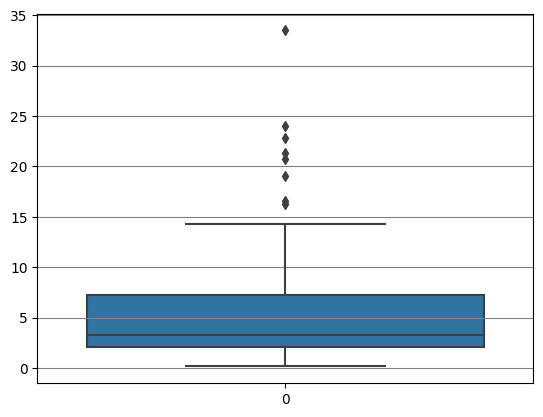

In [128]:
sns.boxplot(result_h1["%_bl_users"])

<AxesSubplot:>

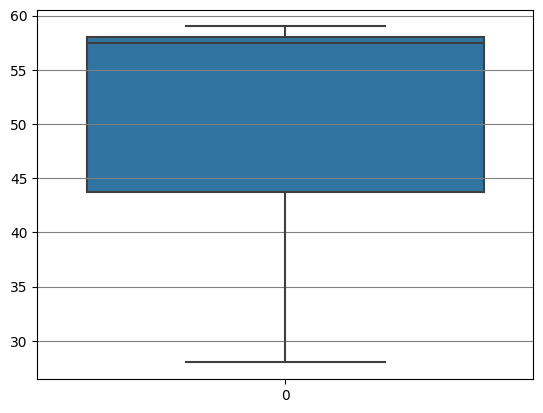

In [129]:
sns.boxplot(result_h1["nb_policies"])

In [165]:
blocked_users.shape

(156,)

In [130]:
pearson_corr =  stat.pearsonr(blocked_users, policies)
print("Pearsons Test: ", pearson_corr)

spearman_corr = stat.spearmanr(blocked_users, policies)
print("Spearman Test: ", spearman_corr)

kendalltau_corr = stat.kendalltau(blocked_users, policies)
print("Kendalltau Test: ", kendalltau_corr)


Pearsons Test:  (0.5413562100446421, 2.9489115636343015e-13)
Spearman Test:  SpearmanrResult(correlation=0.7983031641012389, pvalue=9.772594106619077e-36)
Kendalltau Test:  KendalltauResult(correlation=0.6293946828025501, pvalue=5.2153301226300376e-27)


In [131]:
# # saving
# file_name = 'evolution_of_blocking.csv'
# result_h1.to_csv(folder_result + file_name)

## H2: We expect the rationale for blocking to stabilize over time.

Working with tags

In [132]:
# tags since 2007
tags = 'Vandalism**Vandalism-only**Copyright**Attack**Biographies**Citing**Patent**Spam**promotion**NOTADVERTISING**advertising**Spam**Promotion**Edit warring**Three-revert**Disruptive editing**Harassment**No legal threats**legal threats**Arbitration**Evasion**Sockpuppetry**multiple accounts**Edit filter**Long-term abuse**NOTHERE**{{anonblock}}**{{school block}}**{{rangeblock}}**{{blocked proxy}}**{{uw-ublock}}**{{uw-uhblock}}**{{uw-causeblock}}**{{uw-ublock-wellknown}}**{{uw-ublock-double}}**{{uw-uhblock-double}}**{{uw-softerblock}}**{{uw-spamublock}}**{{Uw-spamblacklistblock}}**{{uw-vaublock}}**{{CheckUser block}}**{{checkuserblock-wide}}**{{checkuserblock-account}}**{{Tor}}**{{webhostblock}}**{{colocationwebhost}}**{{OversightBlock}}'
tags = tags.lower()
tags = tags.split('**')
tags[:5]
# len(tags)

['vandalism', 'vandalism-only', 'copyright', 'attack', 'biographies']

In [133]:
# def tagMatch(x):
#   if any((match := substring) in x.lower() for substring in tags):
#     return match
#   else:
#     return None

def tagMatch(x):
    for substring in tags:
        if substring in x.lower():
            return substring
    return None

df['tag'] = df['comment'].apply(lambda x: tagMatch(x))
nb_tag_uniq = df['tag'].value_counts()

In [134]:
print(len(nb_tag_uniq))
nb_tag_uniq

41


{{blocked proxy}}             2412911
vandalism                      586572
spam                           185006
multiple accounts              101980
{{anonblock}}                   76383
evasion                         46111
{{school block}}                44016
disruptive editing              42913
{{tor}}                         30040
{{checkuserblock-account}}      29205
attack                          26989
{{uw-softerblock}}              21063
promotion                       19216
edit warring                    15566
{{uw-ublock}}                   15228
edit filter                     11743
{{uw-uhblock}}                  11379
nothere                         10515
biographies                      8704
long-term abuse                  7163
copyright                        5174
three-revert                     3347
{{uw-vaublock}}                  3210
{{checkuser block}}              3172
citing                           3103
{{webhostblock}}                 2847
harassment  

In [135]:
df_block_uniq_tag = df[df['action']=='block']
df_comments = df_block_uniq_tag.groupby([df_block_uniq_tag['timestamp'].dt.year, df_block_uniq_tag['tag']]).count()

In [136]:
df_com_copy = df_comments.copy()

In [137]:
df_comments.head()

title  action  user  timestamp  comment  duration  \
timestamp tag                                                                
2004      attack            21      21    21         21       21        21   
          copyright          2       2     2          2        2         2   
          legal threats      1       1     1          1        1         1   
          spam              16      16    16         16       16        16   
          vandalism        182     183   183        183      183       183   

                         flags  expiry  
timestamp tag                           
2004      attack            21       0  
          copyright          2       0  
          legal threats      1       0  
          spam              16       0  
          vandalism        183       0

In [138]:
df_comments.tail()

title  action  user  timestamp  comment  \
timestamp tag                                                              
2017      {{uw-ublock}}           2342    2342  2342       2342     2342   
          {{uw-uhblock-double}}     19      19    19         19       19   
          {{uw-uhblock}}          2517    2517  2517       2517     2517   
          {{uw-vaublock}}          192     192   192        192      192   
          {{webhostblock}}         542     542   542        542      542   

                                 duration  flags  expiry  
timestamp tag                                             
2017      {{uw-ublock}}              2342   2342       0  
          {{uw-uhblock-double}}        19     19       0  
          {{uw-uhblock}}             2517   2517       0  
          {{uw-vaublock}}             192    192       0  
          {{webhostblock}}            542    542     538

In [139]:
# start from 2005
n = 5 # to delete 2004
df_comments.drop(index=df_comments.index[:n], axis=0, inplace=True)

In [140]:
df_comments.head()

title  action  user  timestamp  comment  duration  \
timestamp tag                                                              
2005      advertising      9       9     9          9        9         9   
          arbitration     74      74    74         74       74        74   
          attack         336     343   343        343      343       343   
          citing           1       1     1          1        1         1   
          copyright       30      30    30         30       30        30   

                       flags  expiry  
timestamp tag                         
2005      advertising      9       8  
          arbitration     74      53  
          attack         343     262  
          citing           1       1  
          copyright       30      26

In [141]:
df_comments_yearly = df_comments['action']
df_comments_yearly = df_comments_yearly.rename_axis(['year','tag']).reset_index()

In [142]:
df_comments_yearly.head()

,year,tag,action
0,2005,advertising,9
1,2005,arbitration,74
2,2005,attack,343
3,2005,citing,1
4,2005,copyright,30


In [143]:
df_comments_yearly.tail()

,year,tag,action
420,2017,{{uw-ublock}},2342
421,2017,{{uw-uhblock-double}},19
422,2017,{{uw-uhblock}},2517
423,2017,{{uw-vaublock}},192
424,2017,{{webhostblock}},542


In [144]:
# saving
file_name_q = 'data_qualitative.csv'
df_comments_yearly.to_csv(folder_result + file_name_q)

In [145]:
data = {}

for index, row in df_comments_yearly.iterrows():
    year = row['year']
    tag = row['tag']
    nb_actions_per_tag__this_year = row['action']
    
    if tag not in data:
        data[tag] = year
        print(tag, data[tag])

advertising 2005
arbitration 2005
attack 2005
citing 2005
copyright 2005
disruptive editing 2005
edit warring 2005
evasion 2005
harassment 2005
legal threats 2005
multiple accounts 2005
no legal threats 2005
patent 2005
promotion 2005
sockpuppetry 2005
spam 2005
three-revert 2005
vandalism 2005
{{blocked proxy}} 2005
biographies 2006
long-term abuse 2006
{{anonblock}} 2006
{{school block}} 2006
{{tor}} 2006
{{checkuser block}} 2007
{{checkuserblock-account}} 2007
{{rangeblock}} 2007
{{uw-ublock}} 2007
{{uw-uhblock}} 2007
nothere 2008
{{uw-vaublock}} 2008
edit filter 2009
{{uw-softerblock}} 2009
{{uw-uhblock-double}} 2010
{{uw-causeblock}} 2011
{{uw-ublock-double}} 2011
{{webhostblock}} 2012
{{colocationwebhost}} 2013
{{oversightblock}} 2013
notadvertising 2014
{{checkuserblock-wide}} 2014


In [146]:
print(len(data))

41


In [147]:
rows = []
for tag, year in data.items():
    rows.append({'year': year, 'tag': tag})

tags_invention = pd.DataFrame(rows)

Year of tag creation

In [148]:
tags_invention.tail(10)

,year,tag
31,2009,edit filter
32,2009,{{uw-softerblock}}
33,2010,{{uw-uhblock-double}}
34,2011,{{uw-causeblock}}
35,2011,{{uw-ublock-double}}
36,2012,{{webhostblock}}
37,2013,{{colocationwebhost}}
38,2013,{{oversightblock}}
39,2014,notadvertising
40,2014,{{checkuserblock-wide}}


In [149]:
tags_count_new_year = tags_invention.groupby(['year'])['tag'].count()

In [150]:
rows = []
total_sum = 0
for year, count in tags_count_new_year.items():
    total_sum += count
    rows.append({'year': year, 'count_dropdown_tags': count, 'frequencies_dropdown_tags':total_sum})

df_tags_count_new_year = pd.DataFrame(rows)

Tags frequencies

In [151]:
df_tags_count_new_year

,year,count_dropdown_tags,frequencies_dropdown_tags
0,2005,19,19
1,2006,5,24
2,2007,5,29
3,2008,2,31
4,2009,2,33
5,2010,1,34
6,2011,2,36
7,2012,1,37
8,2013,2,39
9,2014,2,41


In [152]:
# saving
file_name = 'year_count_freq.csv'
df_tags_count_new_year.to_csv(folder_result + file_name)

In [153]:
df_block_uniq_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4067771 entries, 0 to 4202625
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   title      object        
 1   action     object        
 2   user       object        
 3   timestamp  datetime64[ns]
 4   comment    object        
 5   duration   object        
 6   flags      object        
 7   expiry     object        
 8   tag        object        
dtypes: datetime64[ns](1), object(8)
memory usage: 310.3+ MB


### Blocklog tags

In [154]:
df_block_uniq_tag.head()

,title,action,user,timestamp,comment,duration,flags,expiry,tag
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,[],NaN,None
2,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,[],NaN,None
3,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,[],NaN,None
4,166.121.36.7,block,CryptoDerk,2004-12-23,"repeated repeated warnings, continued vandalism",infinity,[],NaN,vandalism
5,68.210.228.209,block,CryptoDerk,2004-12-23,repeated warnings,infinity,[],NaN,None


In [155]:
df_ac_block_tag_n_y = df_block_uniq_tag[pd.isnull(df_block_uniq_tag['tag'])].groupby(df_block_uniq_tag['timestamp'].dt.year).size().reset_index(name='count')
df_ac_block_tag_n_y.drop(index = df_ac_block_tag_n_y.index[0], axis=0, inplace=True)
df_ac_block_tag_n_y = df_ac_block_tag_n_y.reset_index()
df_ac_block_tag_n_y = df_ac_block_tag_n_y.drop(columns = 'index')
df_ac_block_tag_n_y = df_ac_block_tag_n_y.rename(columns={"count": "count_none_tag", "timestamp": "year"})

In [156]:
df_ac_block_tag_n_y

,year,count_none_tag
0,2005,15331
1,2006,38278
2,2007,91586
3,2008,65528
4,2009,36820
5,2010,16718
6,2011,24330
7,2012,21695
8,2013,21424
9,2014,20473


In [157]:
df1 = df_ac_block_tag_n_y
df4 = df_tags_count_new_year
df_none_tag_yearly = pd.merge(df1, df4, how="outer",  left_on='year', right_on='year')
df_none_tag_yearly[['count_dropdown_tags','frequencies_dropdown_tags']] = df_none_tag_yearly[['count_dropdown_tags','frequencies_dropdown_tags']].fillna(0)

### None tag yearly

In [158]:
df_none_tag_yearly

,year,count_none_tag,count_dropdown_tags,frequencies_dropdown_tags
0,2005,15331,19.0,19.0
1,2006,38278,5.0,24.0
2,2007,91586,5.0,29.0
3,2008,65528,2.0,31.0
4,2009,36820,2.0,33.0
5,2010,16718,1.0,34.0
6,2011,24330,2.0,36.0
7,2012,21695,1.0,37.0
8,2013,21424,2.0,39.0
9,2014,20473,2.0,41.0


### Bar plot

In [159]:
x = df_none_tag_yearly['year']
y = df_none_tag_yearly['count_none_tag']
y2 = df_none_tag_yearly['frequencies_dropdown_tags']

title = "Yearly occurences of None tag in blocking rationale (from dropdown menu)"
xlabel = "Year"
ylabel = "Number of None tags"

In [160]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

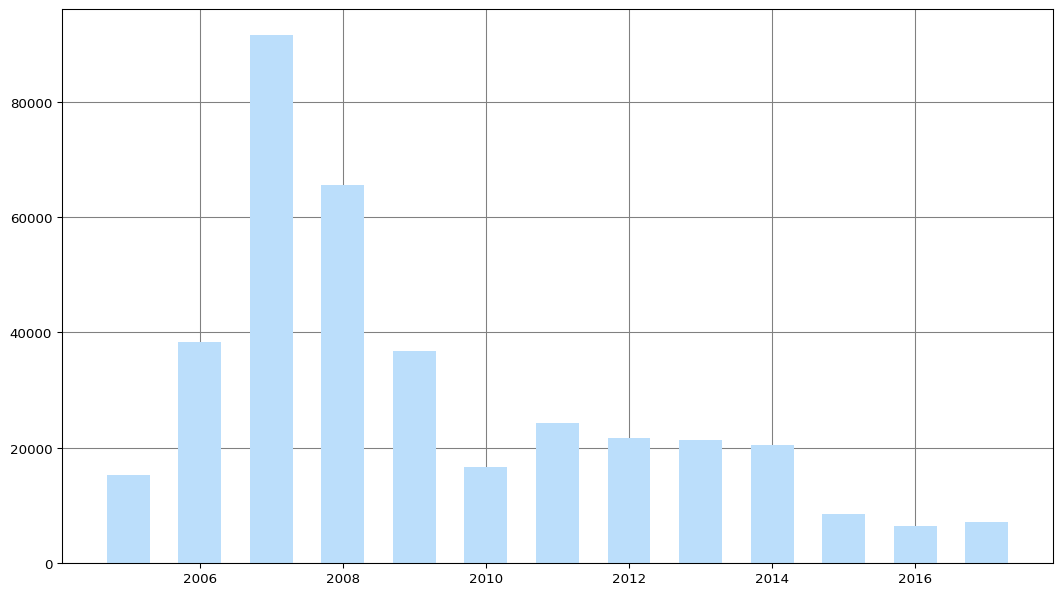

In [161]:
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
# norm = mpl.colors.Normalize(y.min(), y.max()) # linearly normalizes data into the [0.0, 1.0] interval
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot bars
# bar1 = ax.bar(x, y, color=cmap(norm(y)), width=0.6, zorder=2)
bar1 = ax.bar(x, y, color=cmap(y), width=0.6, zorder=2)

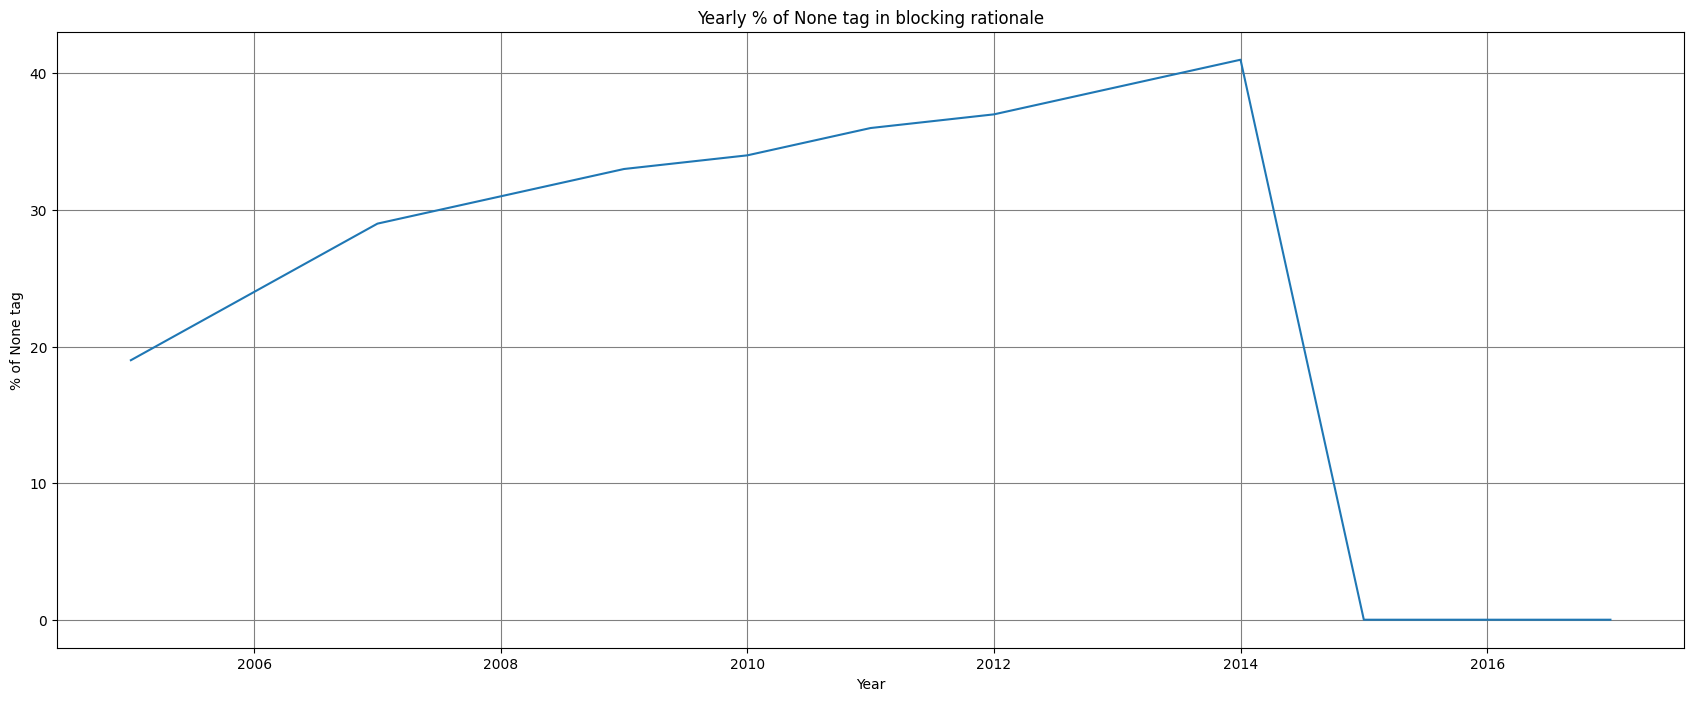

In [162]:
title = "Yearly % of None tag in blocking rationale"
xlabel = "Year"
ylabel = "% of None tag"
show_plot_1(x, y2, title, xlabel, ylabel)

In [163]:
# saving
file_name = 'NoneTagYearly.csv'
df_none_tag_yearly.to_csv(folder_result + file_name)